<a href="https://colab.research.google.com/github/NikoriakViktot/Data_Science_Course_SSWU/blob/main/Clustering_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризація клієнтів

## Про дані

### Задача

Аналіз особистості клієнта – це детальний аналіз ідеальних клієнтів компанії. Він допомагає компанії краще розуміти своїх клієнтів і полегшує підбір продуктів для них відповідно до конкретних потреб, поведінки та проблем різних типів клієнтів.

Аналіз особистості клієнта допомагає компанії модифікувати свій продукт на основі цільових клієнтів із різних сегментів споживачів. Наприклад, замість того, щоб витрачати гроші на просування нового продукту кожному клієнту в базі даних компанії, компанія може проаналізувати, який сегмент споживачів найімовірніше придбає продукт, а потім продавати продукт лише в цьому конкретному сегменті.

### Параметри

#### - Характеристи людей

- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

#### - Характеристики товарів

- **MntWines**: Amount spent on wine in last 2 years
- **MntFruits**: Amount spent on fruits in last 2 years
- **MntMeatProducts**: Amount spent on meat in last 2 years
- **MntFishProducts**: Amount spent on fish in last 2 years
- **MntSweetProducts**: Amount spent on sweets in last 2 years
- **MntGoldProds**: Amount spent on gold in last 2 years

#### - Інформація про акції

- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### - Інформація про покупки

- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company’s website in the last month

### Ціль
Здійснити кластеризацію з метою визначення цільових сегментів споживачів.

### Подяка
Набір даних для цього проекту надав доктор Омар Ромеро-Ернандес.

### Рішення
Ви можете отримати допомогу за наступним посиланням, щоб дізнатися більше про підхід до вирішення цієї проблеми.
Деталі за посиланням: https://thecleverprogrammer.com/2021/02/08/customer-personality-analysis-with-python/


# Підготовка середовища

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as shc

# Підготовка даних

### Зчитування

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/marketing_campaign.csv', sep="\t")
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# перевіряємо розмір датафрейму
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (2240, 29)


In [ ]:
# перевіримо основні характеристики
print("\nInformation about the dataframe:")
df.info()


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumD

як бачимо, більшість даних вже числові і пропуски є лише в полі Income

In [ ]:
# перевіримо описову статистику
print("\nSummary statistics of the dataframe:")
df.describe()


Summary statistics of the dataframe:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# перевіримо описову статистику текстових полів
print("\nSummary statistics of the dataframe:")
df.describe(include='object')


Summary statistics of the dataframe:


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### Missing Data

In [ ]:
# Ще раз перевіримо на пропущені дані
print("Missing data in the dataframe:")
df.isnull().sum()

Missing data in the dataframe:


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


<Axes: >

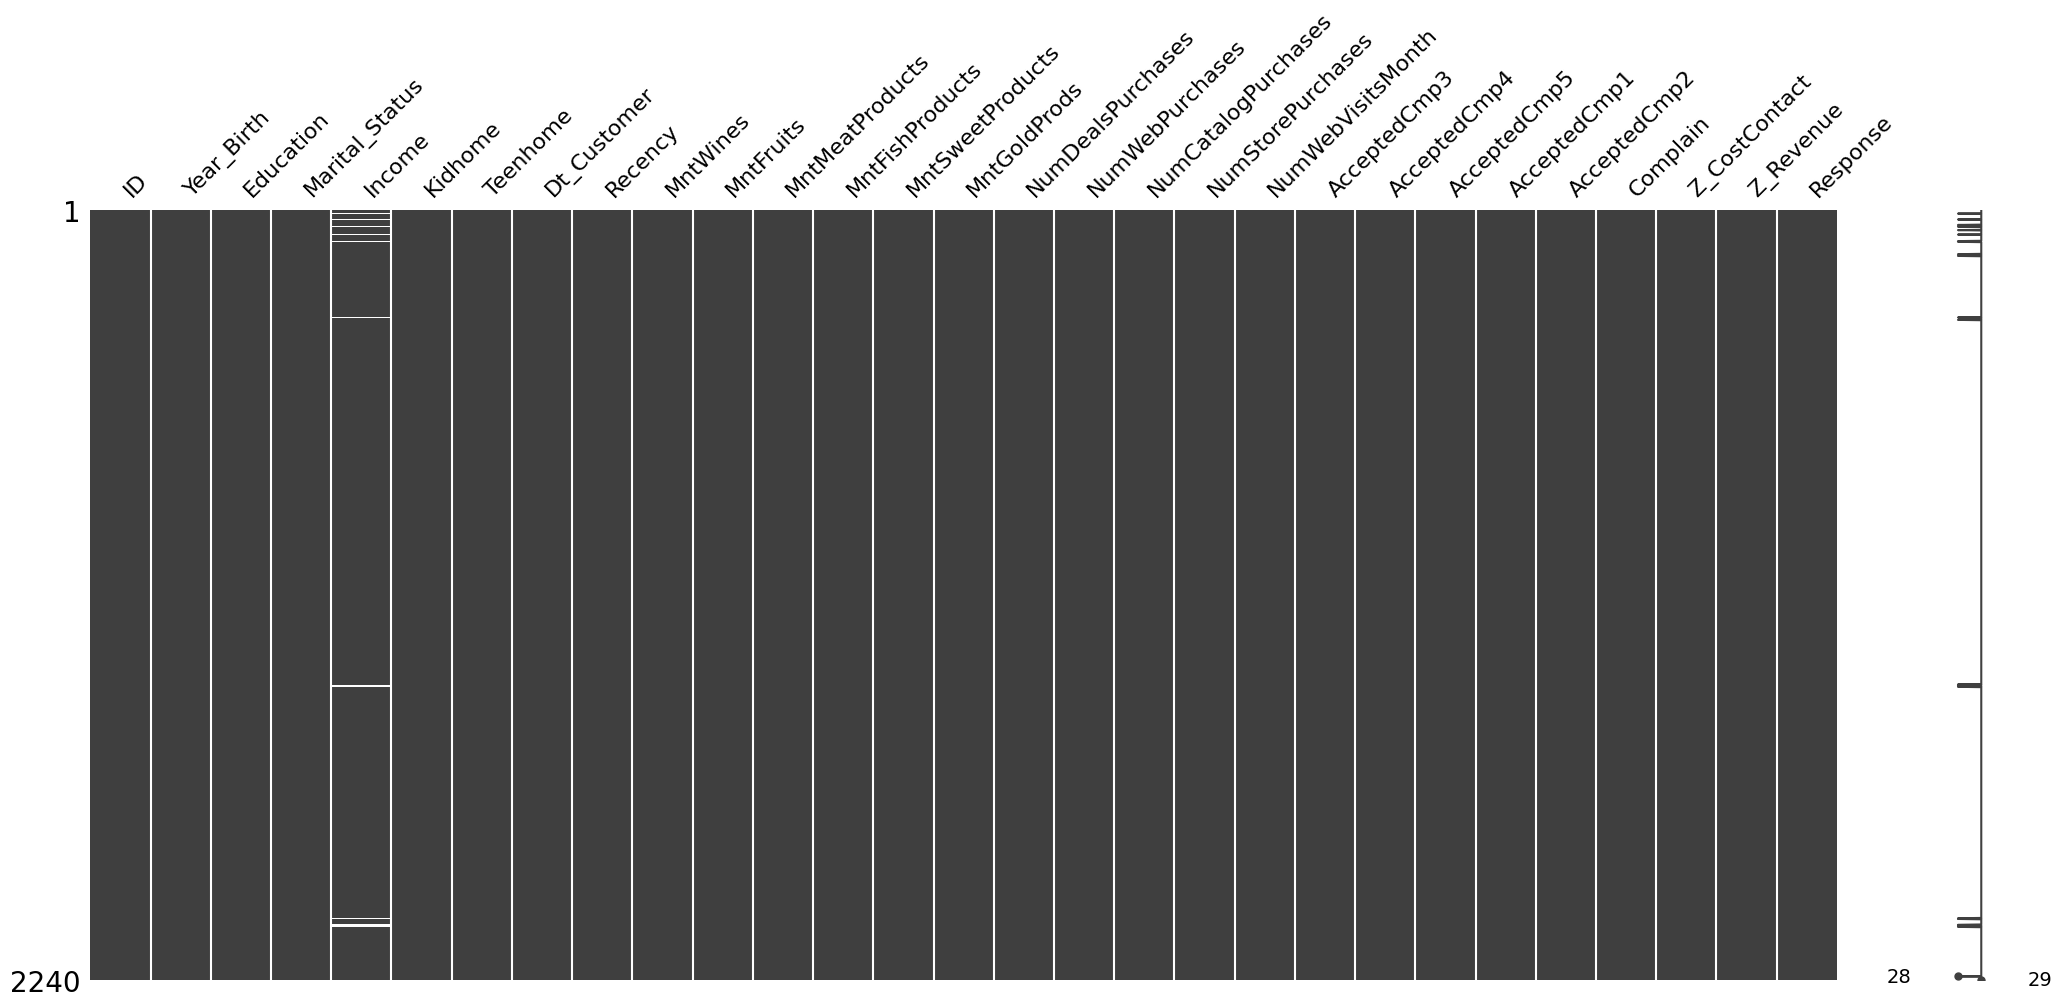

In [ ]:
# інструмент візуалізації пропущених даних
msno.matrix(df)

In [ ]:
# зімітуємо пропуски
df_missed = df.copy()
for c in df.columns.tolist():
  rows = np.random.randint(df.shape[0], size=100)
  df_missed.loc[rows, c] = np.nan
df_missed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2142 non-null   float64
 1   Year_Birth           2141 non-null   float64
 2   Education            2142 non-null   object 
 3   Marital_Status       2141 non-null   object 
 4   Income               2117 non-null   float64
 5   Kidhome              2143 non-null   float64
 6   Teenhome             2142 non-null   float64
 7   Dt_Customer          2142 non-null   object 
 8   Recency              2141 non-null   float64
 9   MntWines             2142 non-null   float64
 10  MntFruits            2143 non-null   float64
 11  MntMeatProducts      2142 non-null   float64
 12  MntFishProducts      2140 non-null   float64
 13  MntSweetProducts     2141 non-null   float64
 14  MntGoldProds         2141 non-null   float64
 15  NumDealsPurchases    2142 non-null   f

<Axes: >

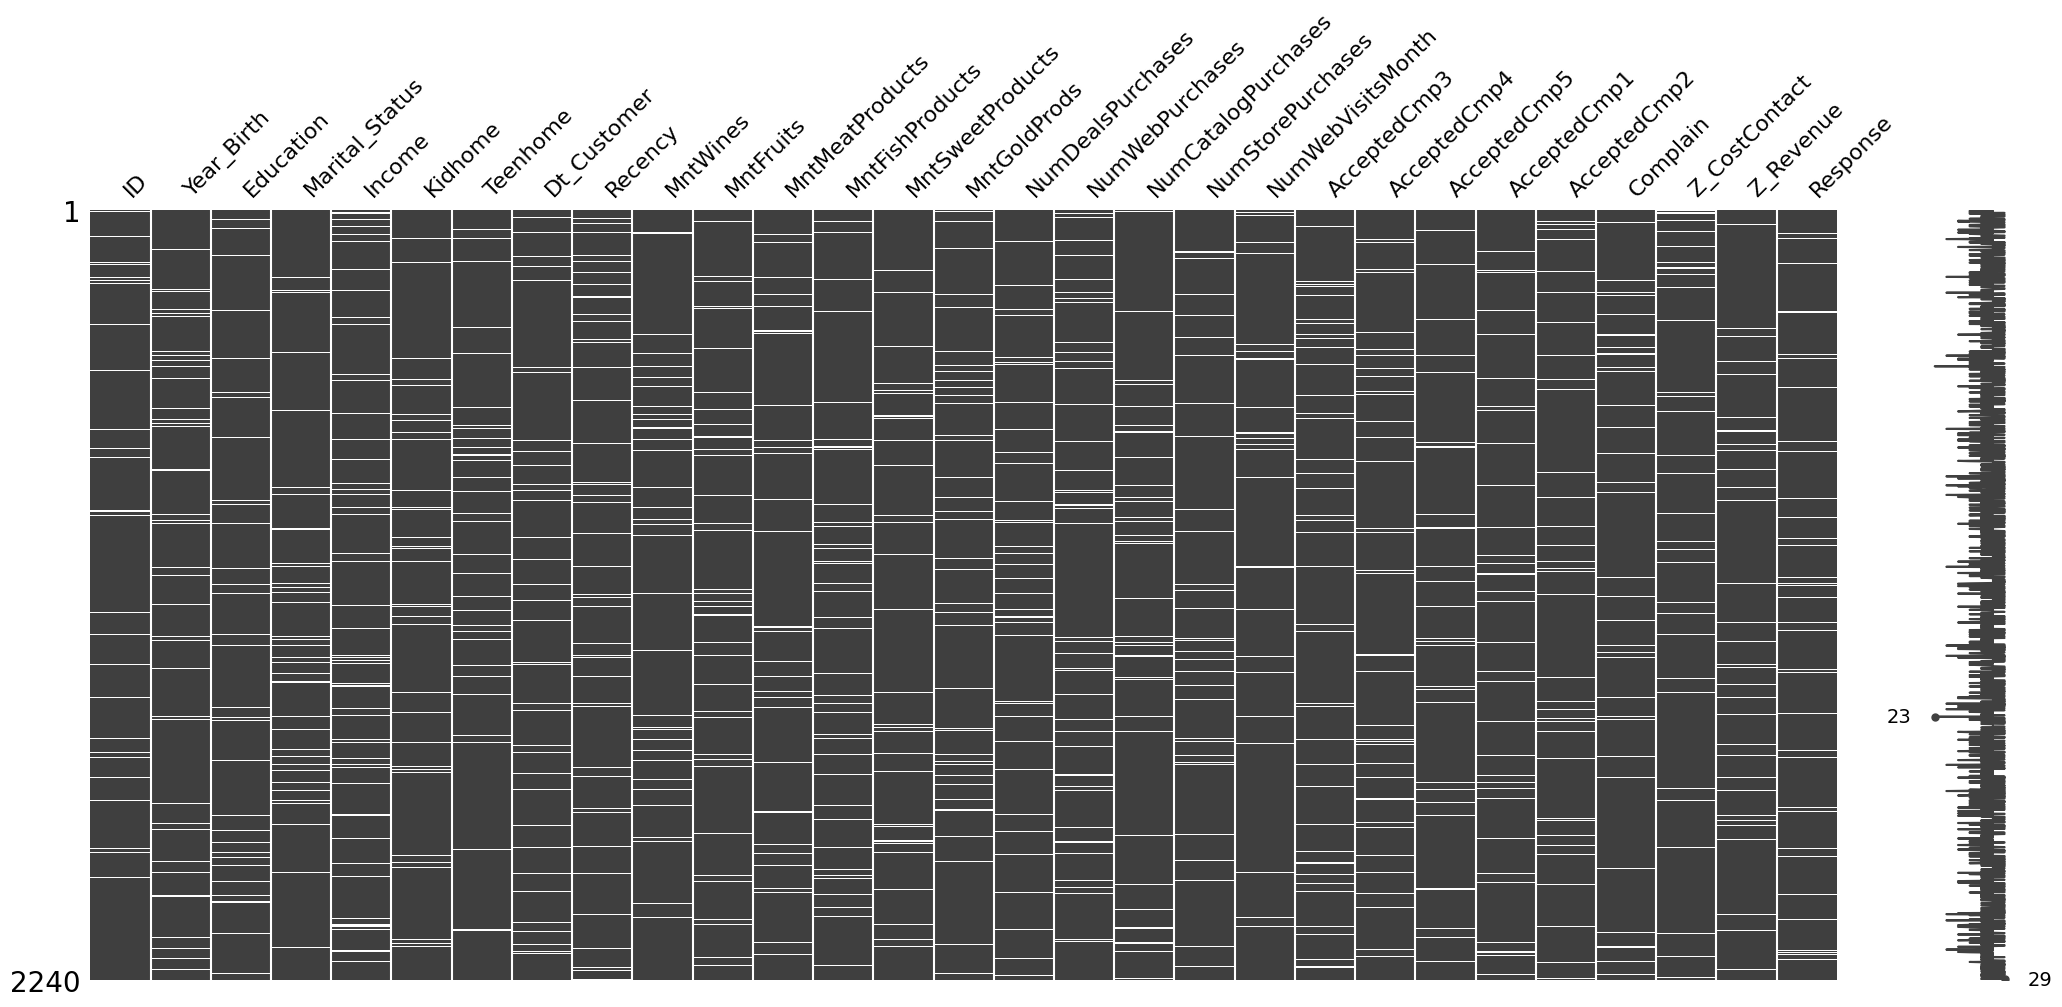

In [ ]:
msno.matrix(df_missed)

так як пропущені дані існують лише в колонці і складають малу частку (24 з 2240) ми можемо їх видалити або заповнити середніми. видалимо.

In [ ]:
df = df.dropna()

In [ ]:
df.duplicated().sum()

np.int64(0)

### Пошукаємо прості викиди

<Axes: >

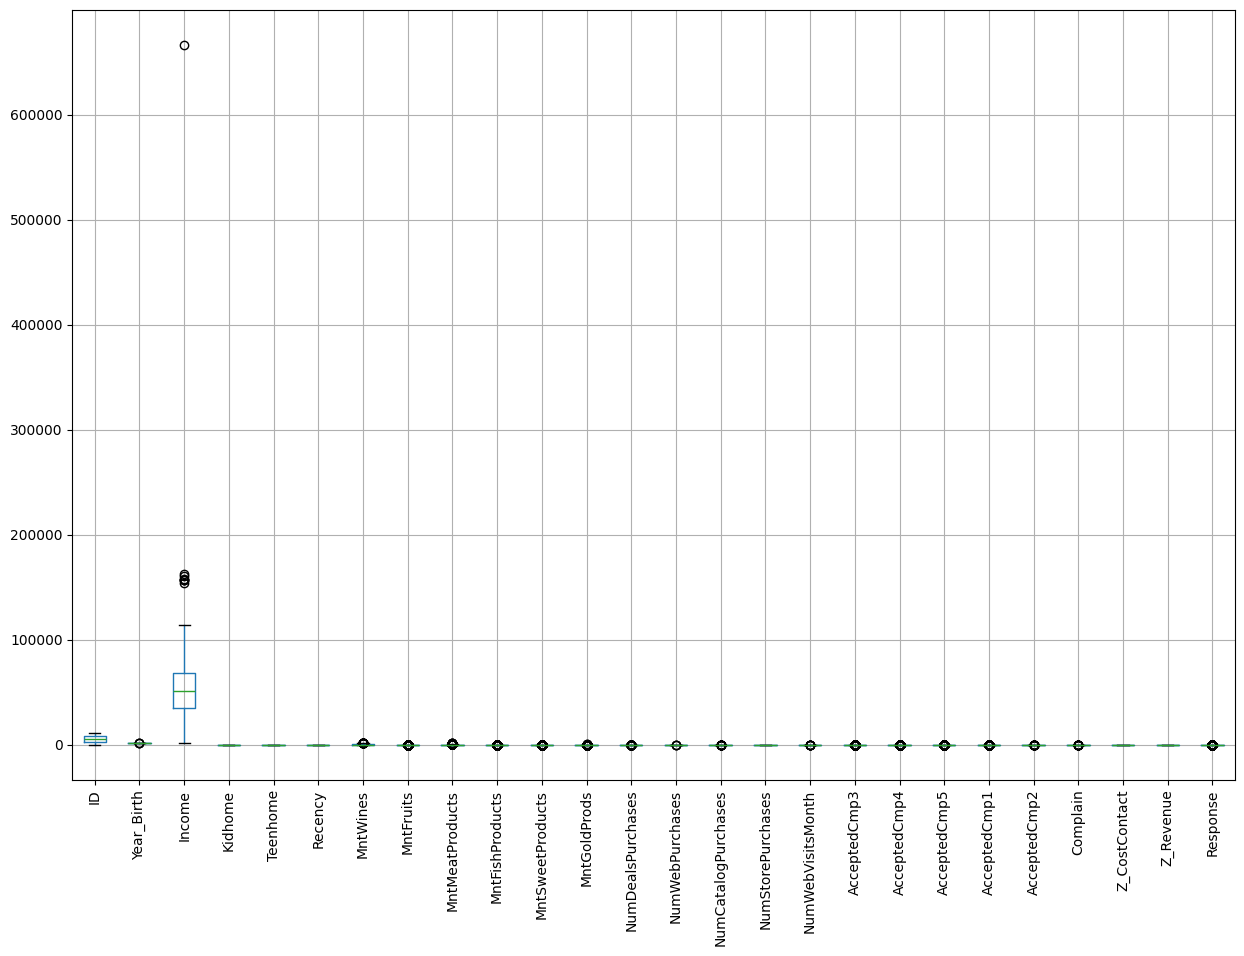

In [ ]:
df.boxplot(figsize=(15, 10), rot=90)

<ipython-input-16-b05cde467086>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i, figsize=(15,6))


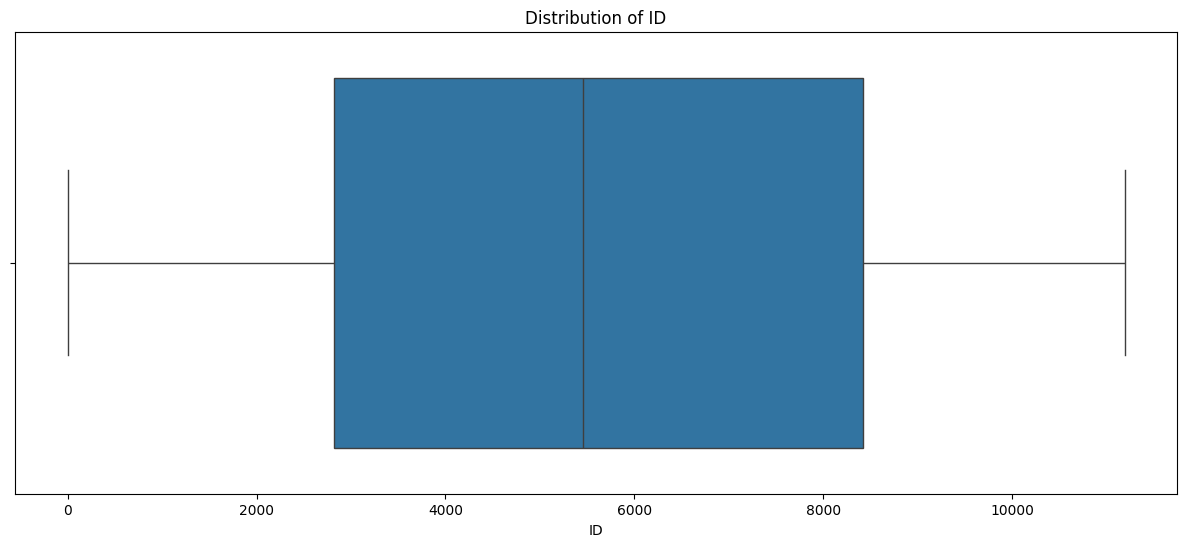

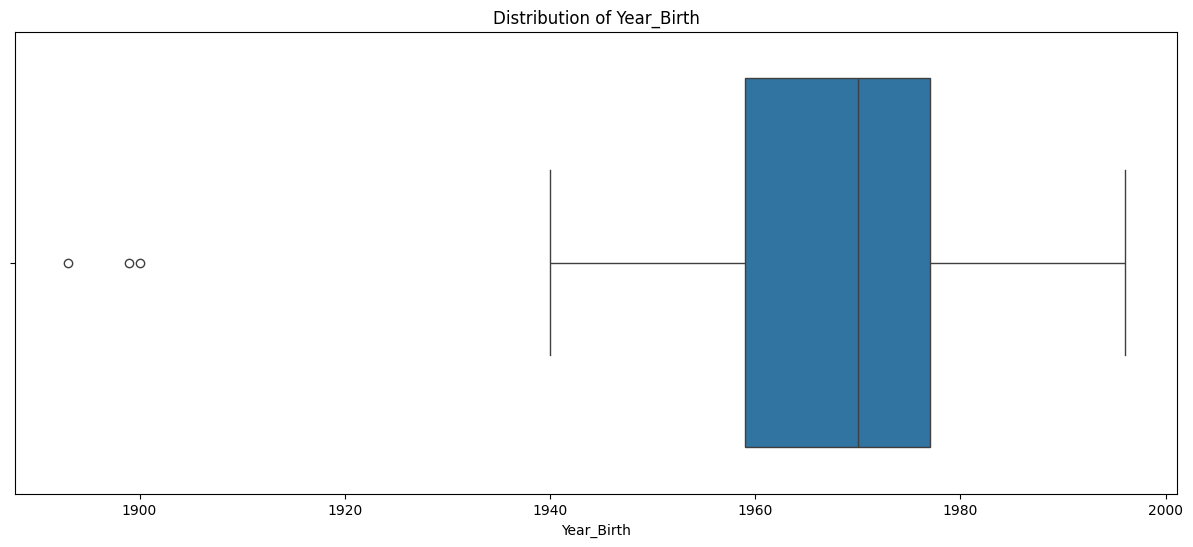

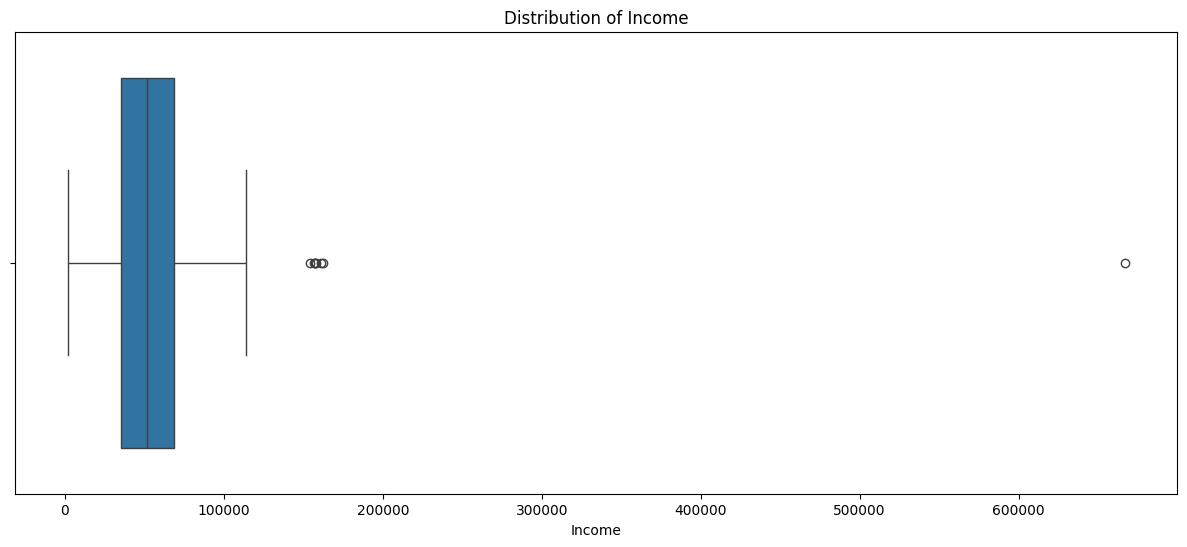

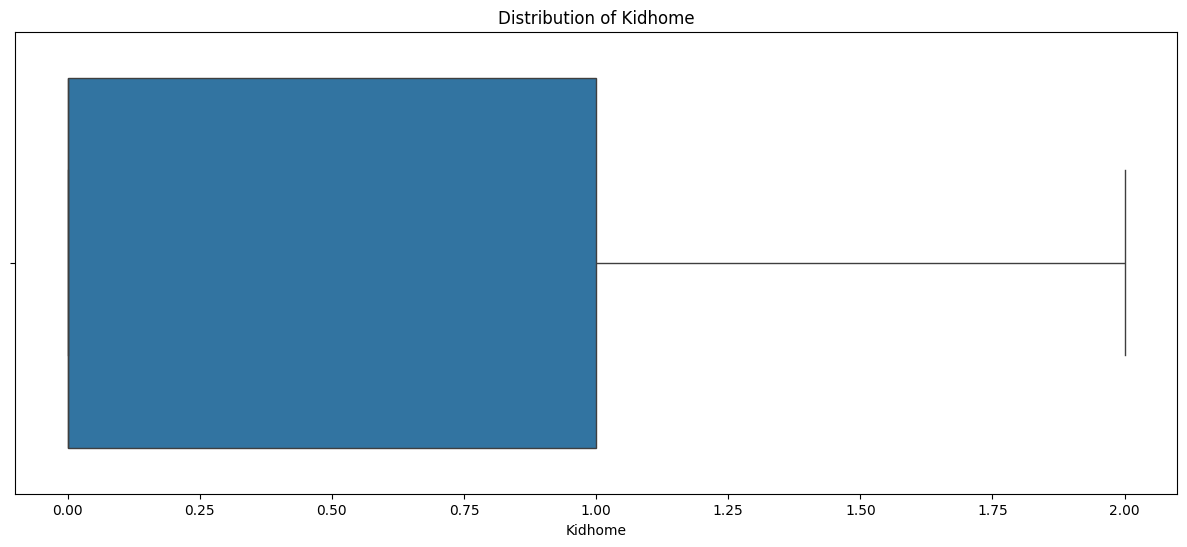

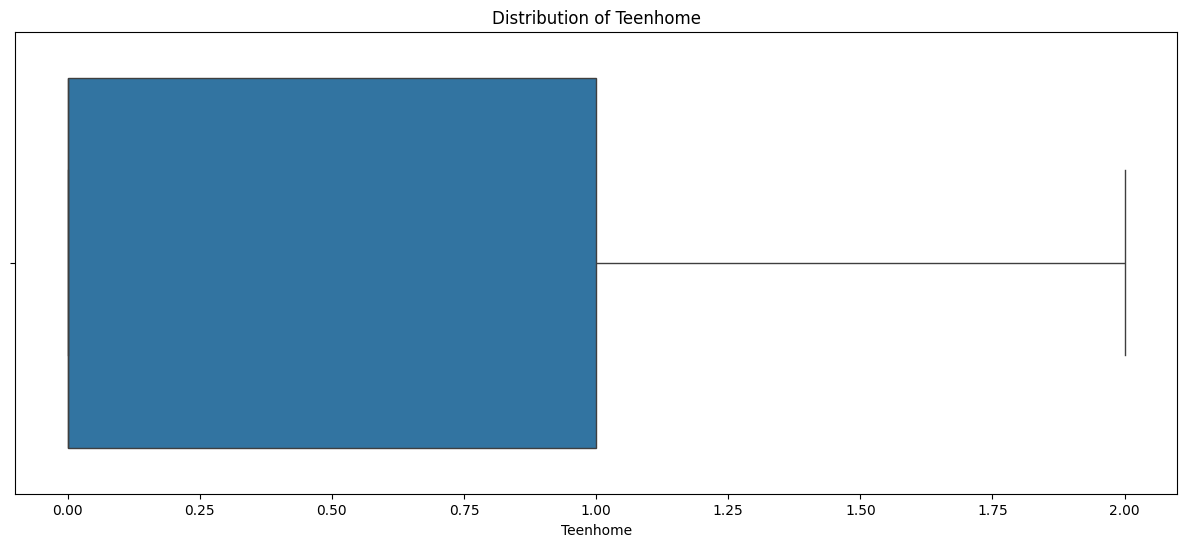

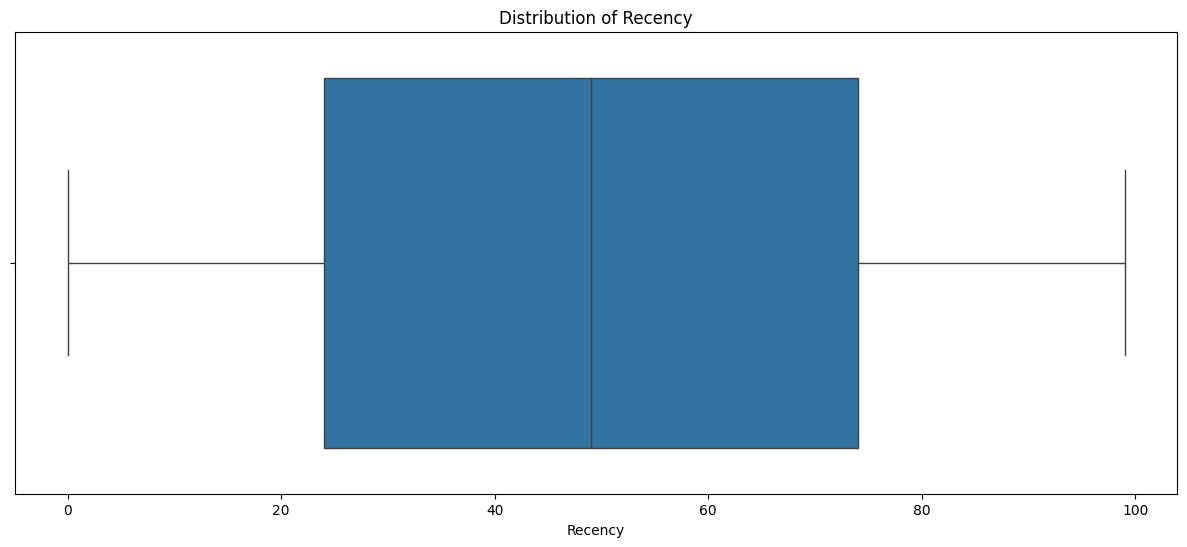

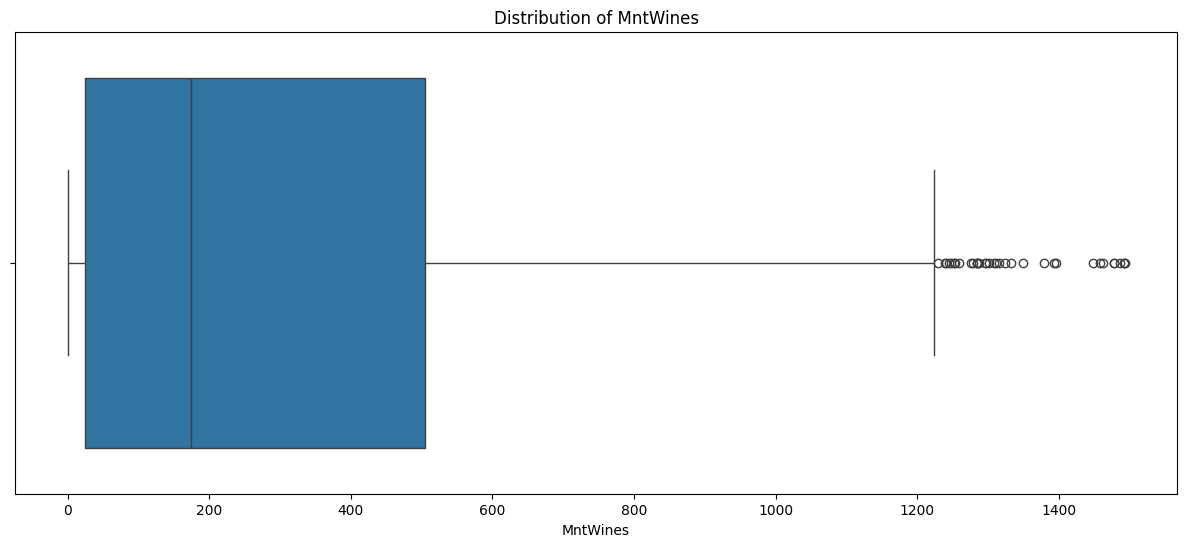

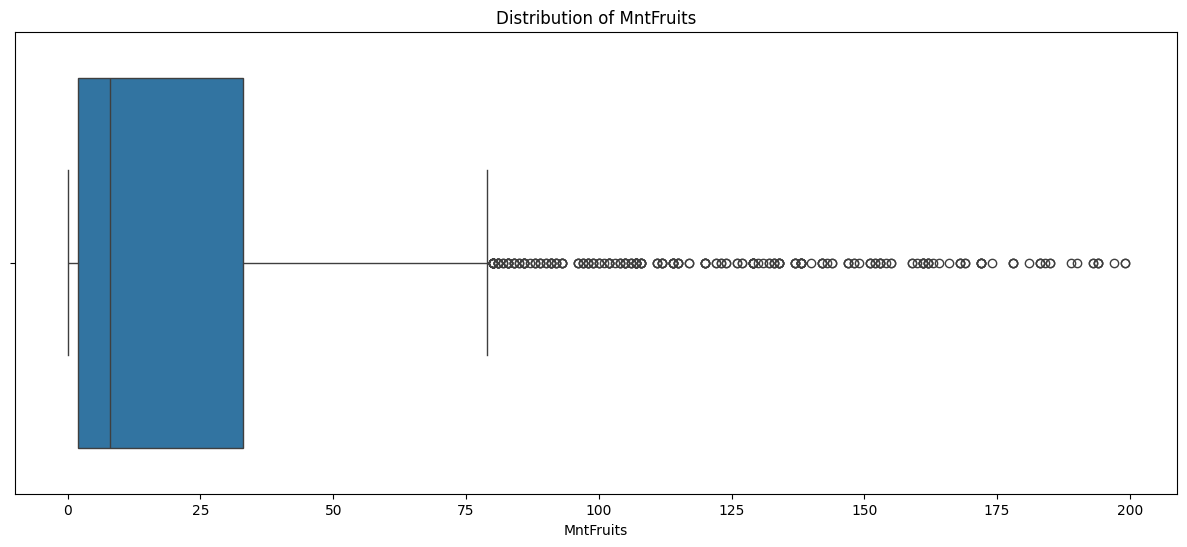

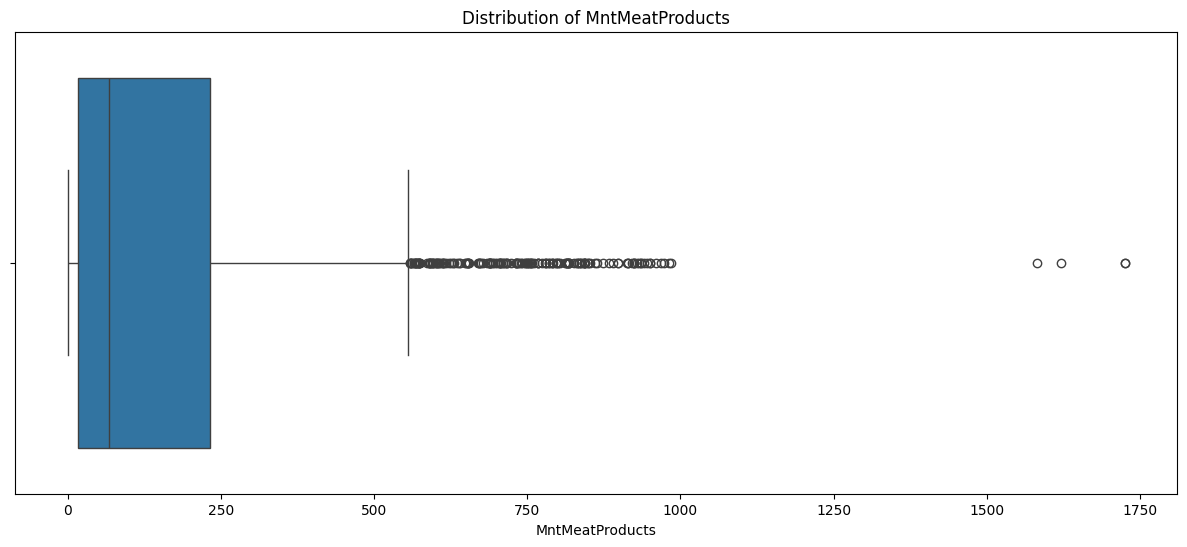

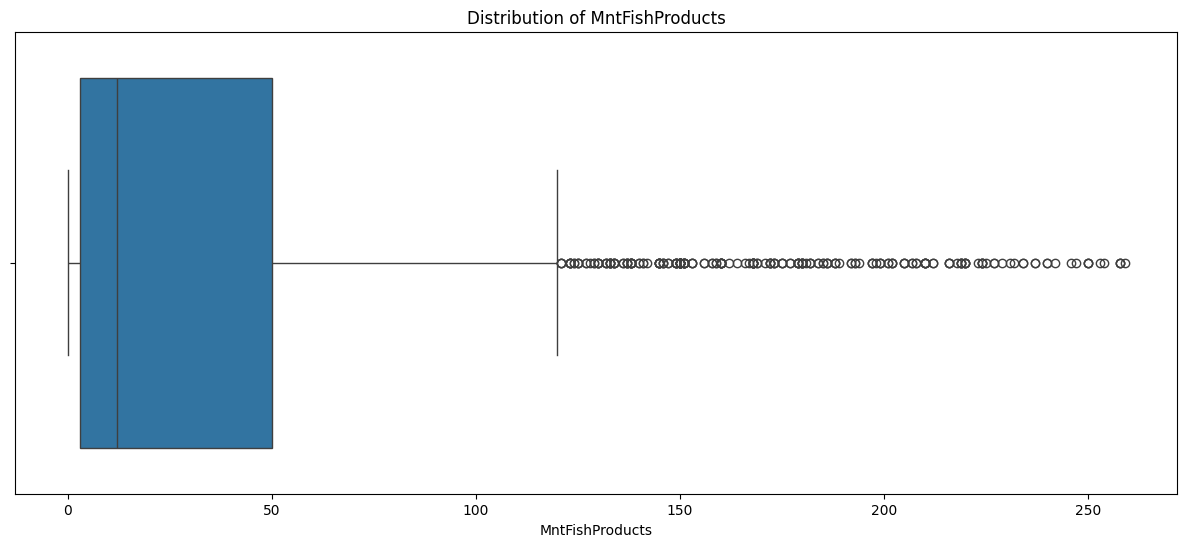

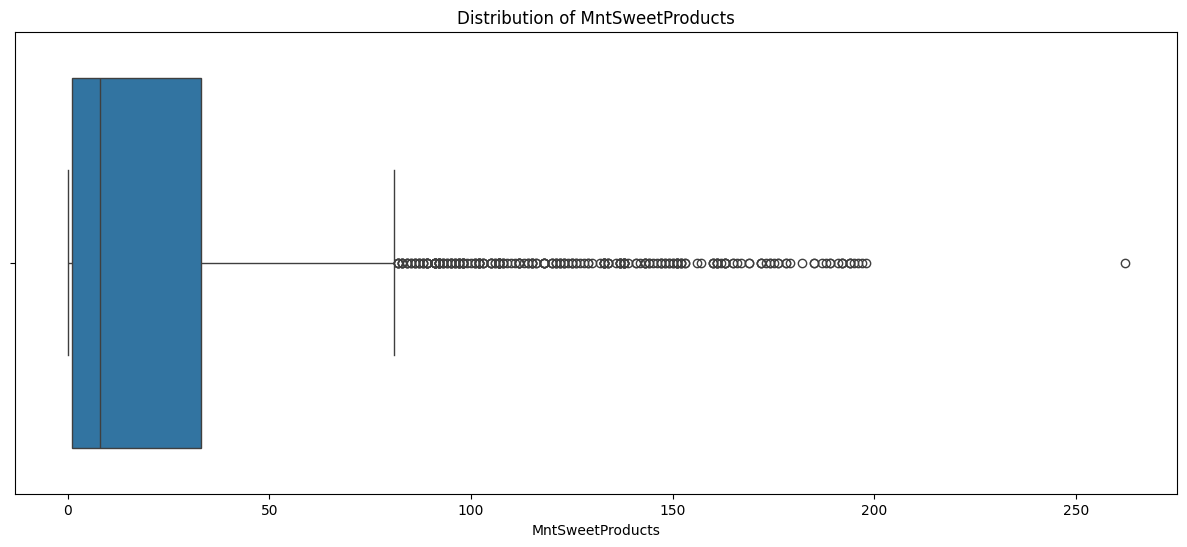

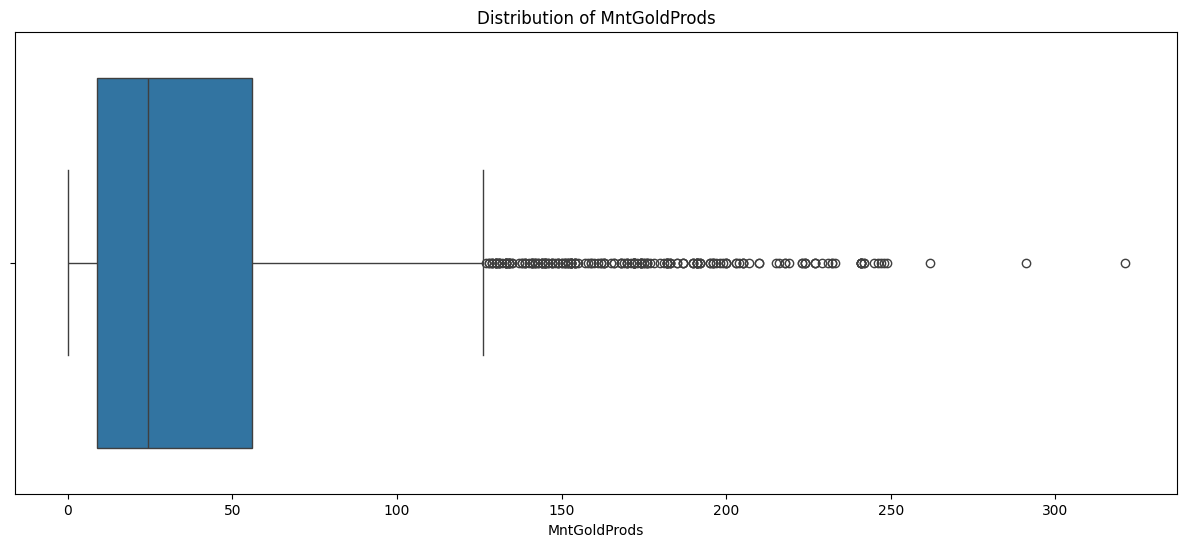

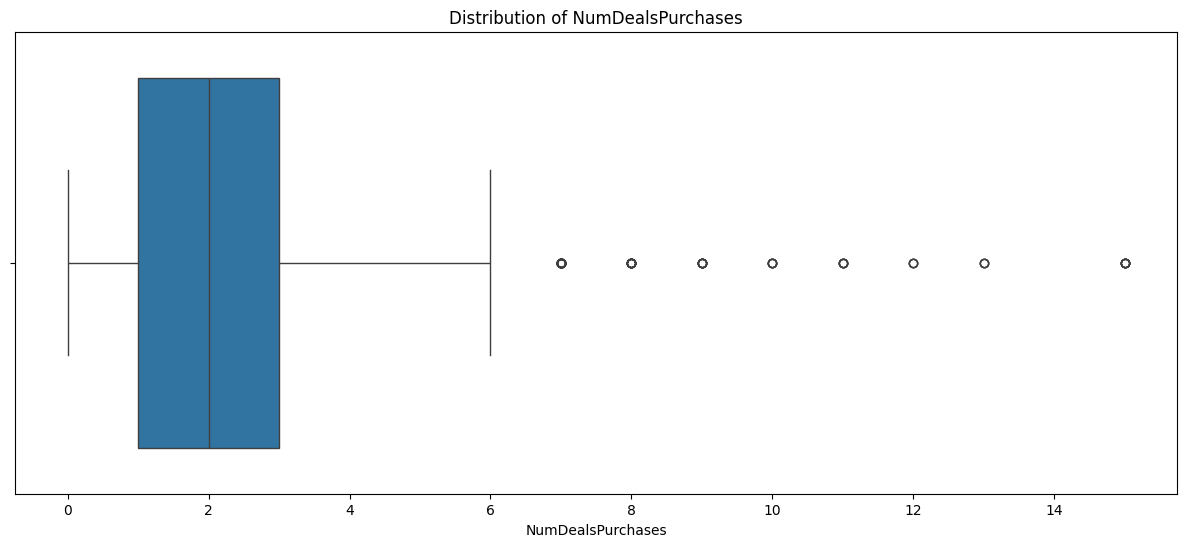

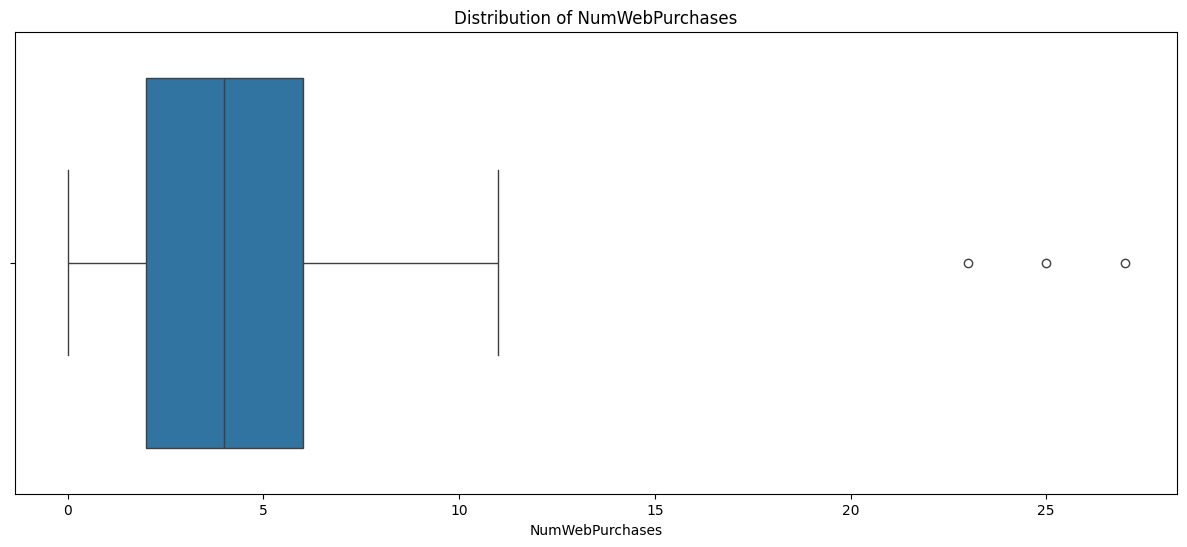

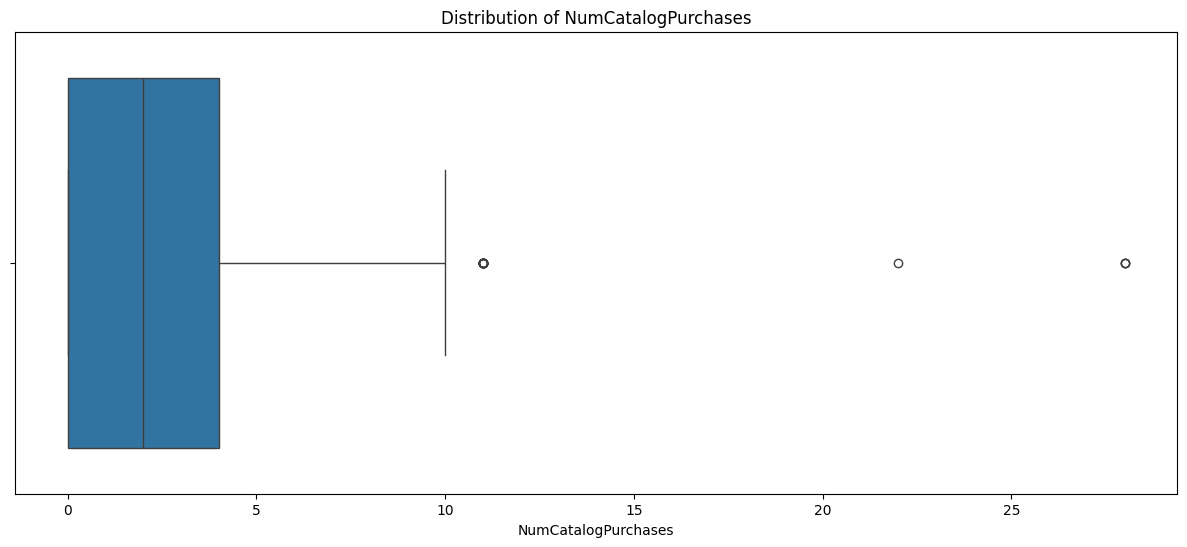

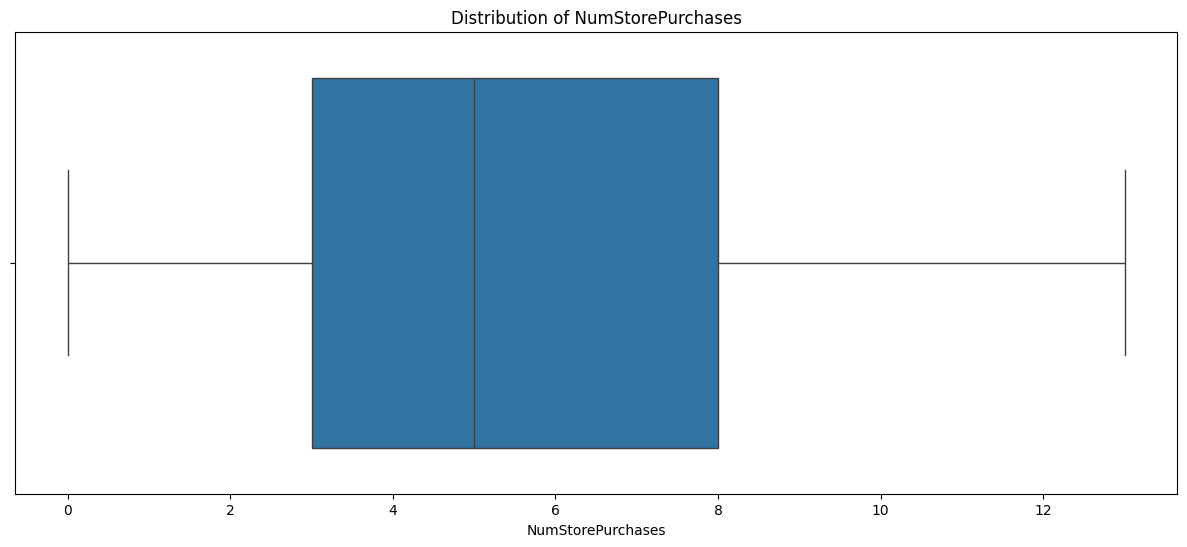

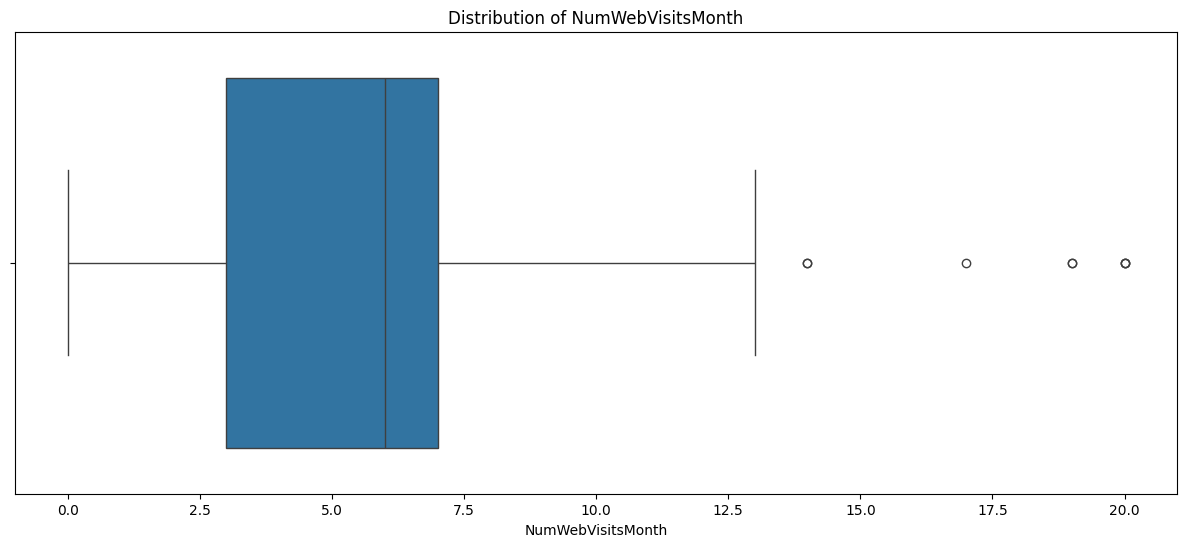

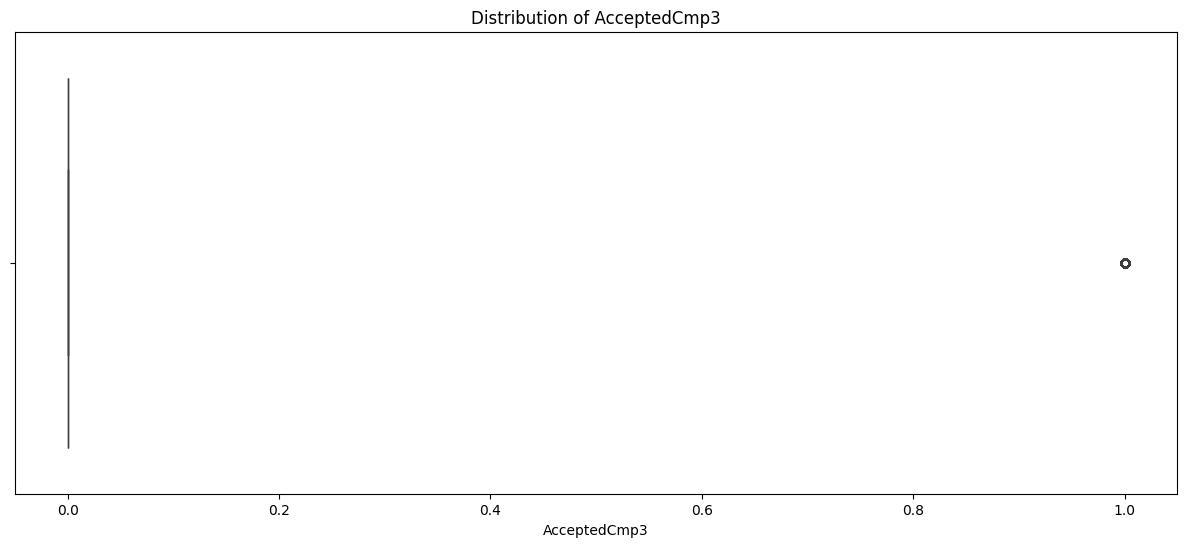

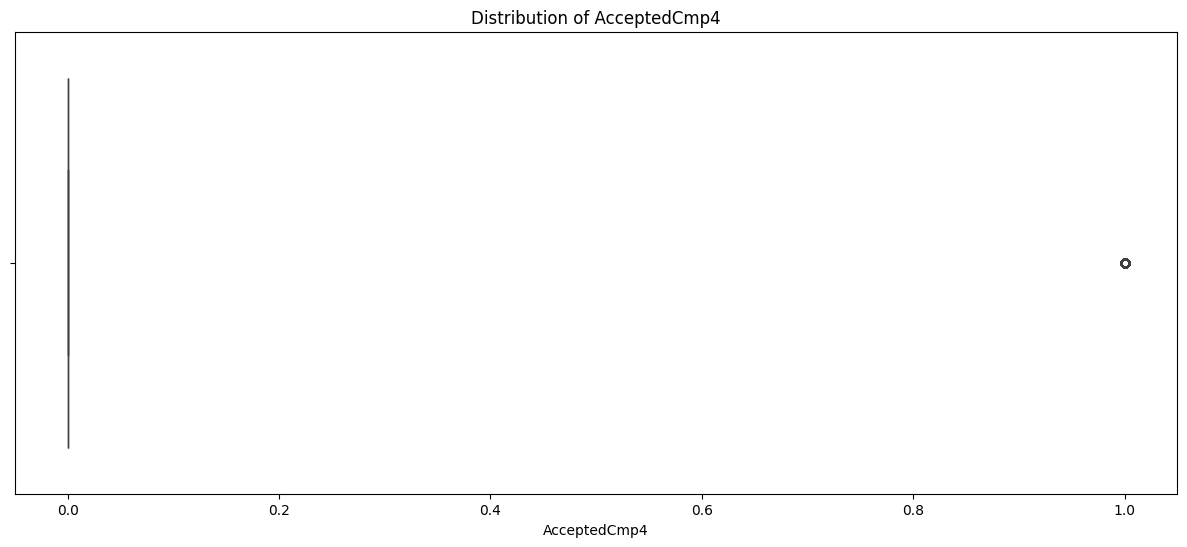

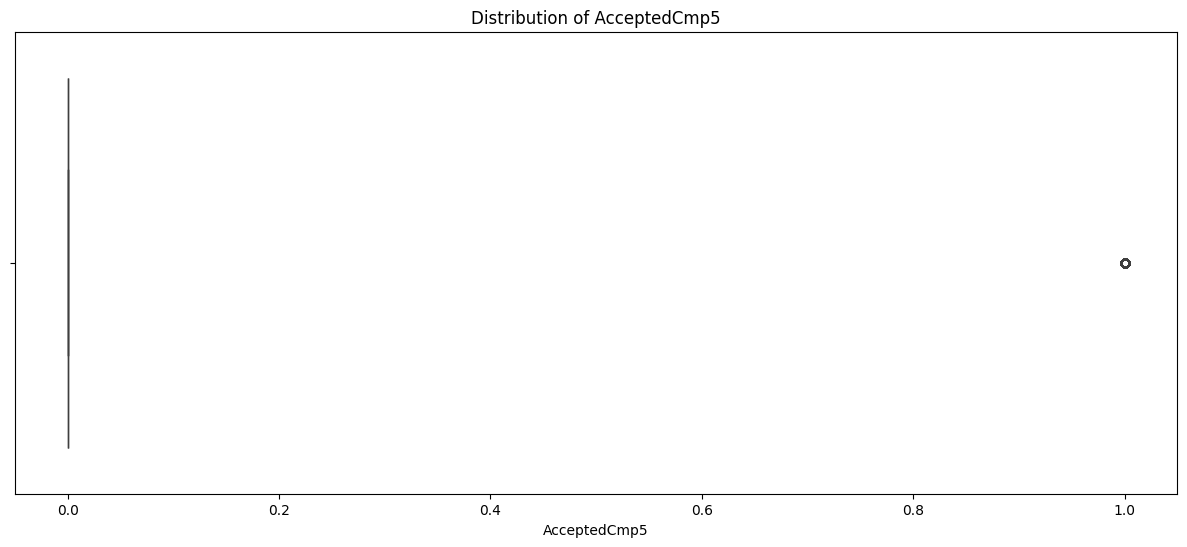

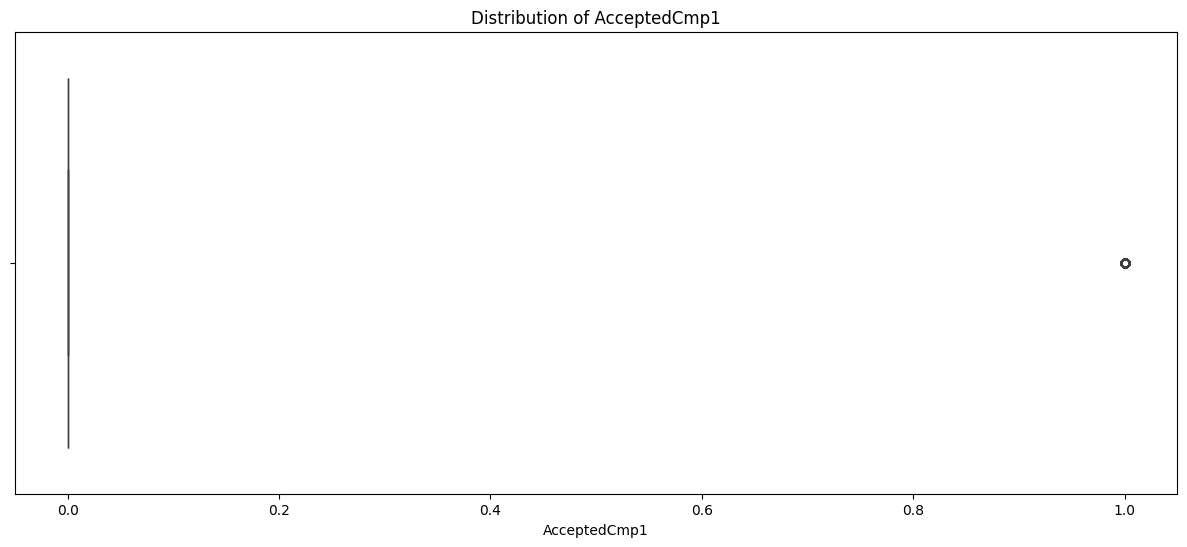

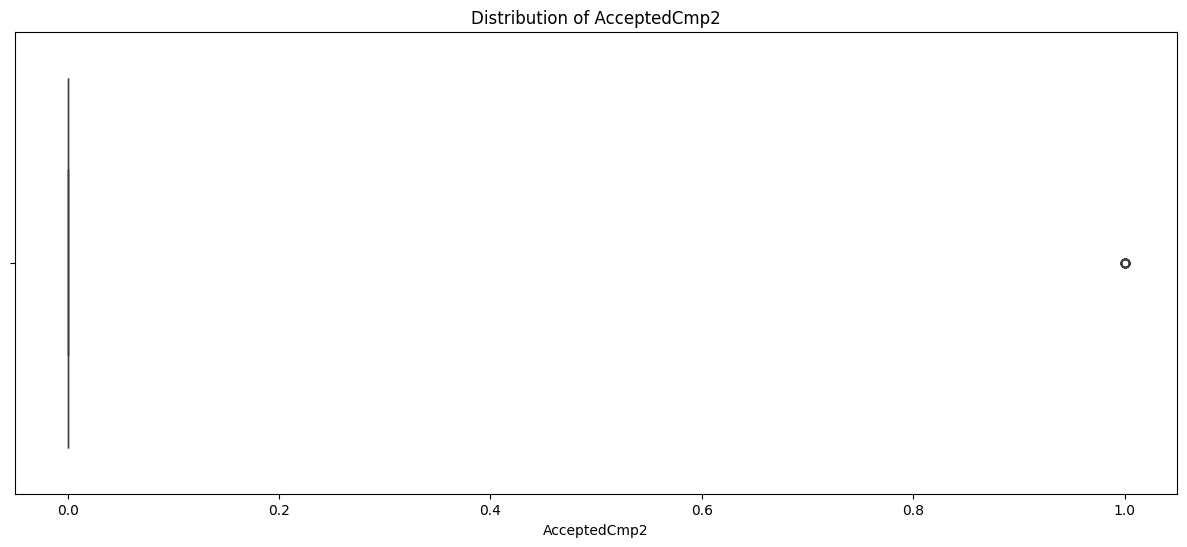

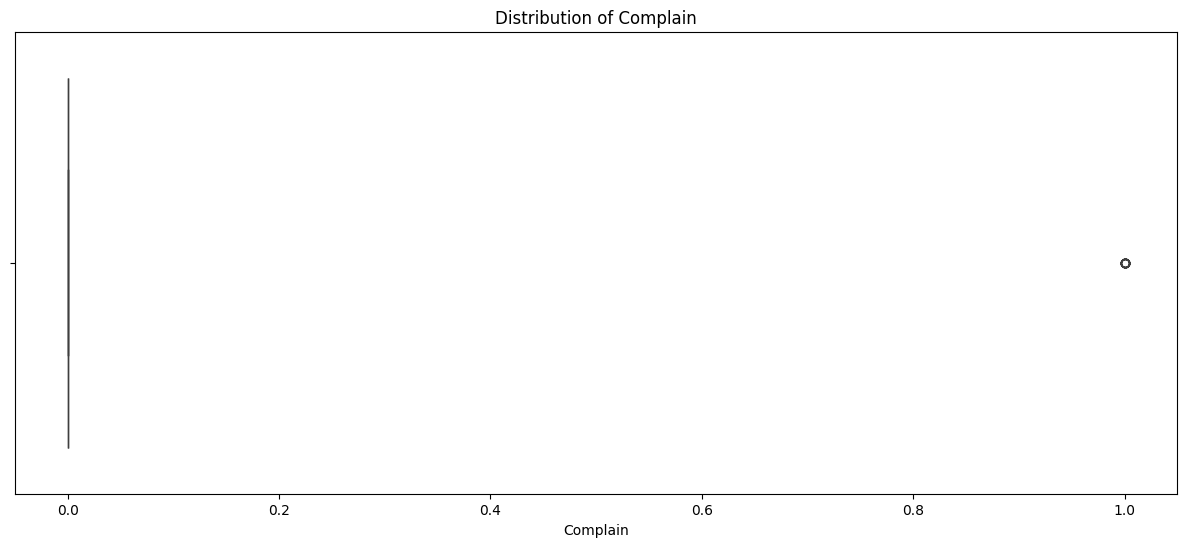

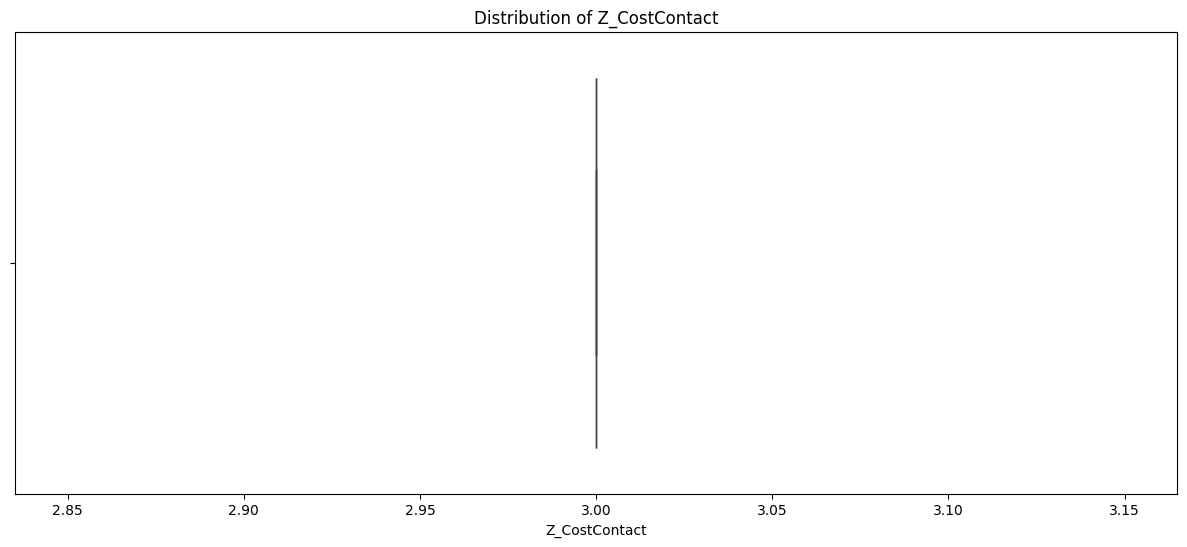

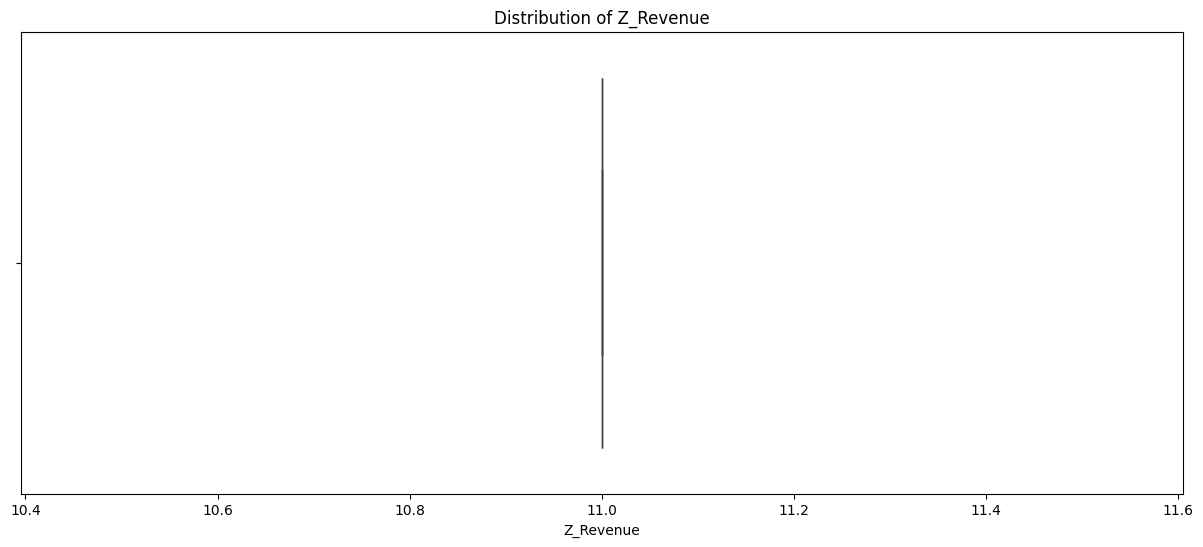

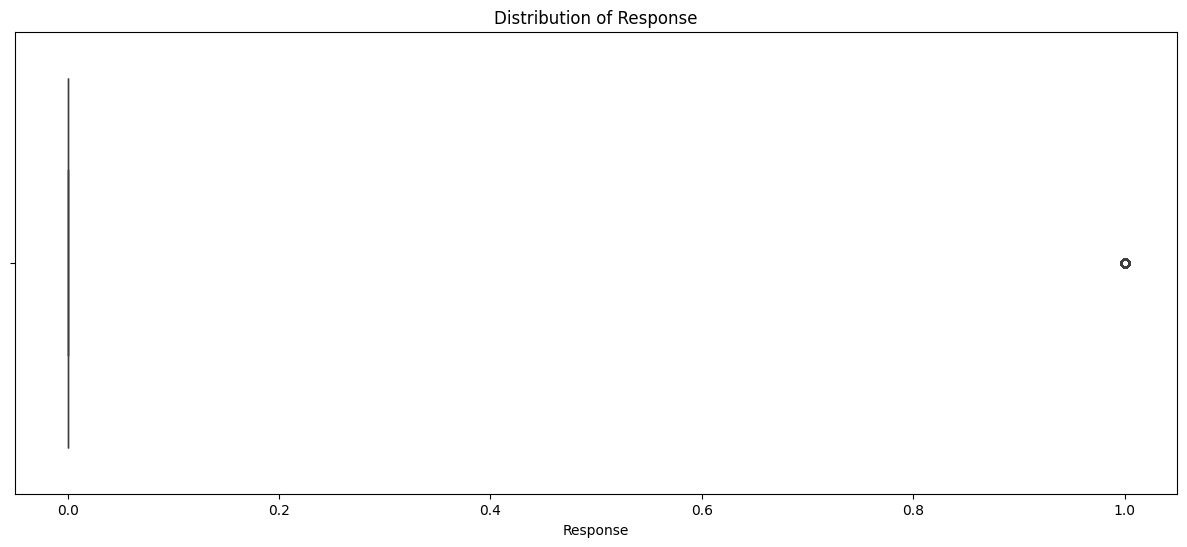

In [ ]:
df1 = df.select_dtypes([int, float])
for i, col in enumerate(df1.columns):
    plt.figure(i, figsize=(15,6))
    sns.boxplot(x=col, data=df1).set_title(f'Distribution of {col}')

In [ ]:
# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 8


In [ ]:
# Remove the outliers in the Income column
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Print the updated shape of the dataframe
print("Updated shape of the dataframe:", df.shape)

Updated shape of the dataframe: (2208, 29)


Text(0.5, 1.0, 'Distribution of Income')

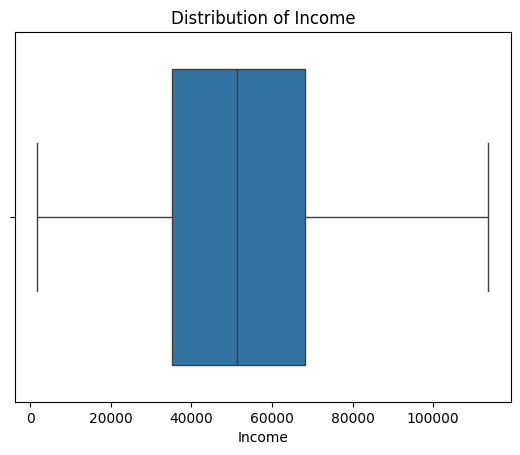

In [ ]:
# Plot the distribution of a column to visualize the outliers
sns.boxplot(x=df['Income']).set_title('Distribution of Income')

# Feature engineering

### Creating new features/columns

In [ ]:
print("Unique values in Education column:", df['Education'].unique())
print("Unique values in Marital_Status column:", df['Marital_Status'].unique())


Unique values in Education column: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Marital_Status column: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [ ]:
df.Education.value_counts()/df.shape[0]

,count
Education,
Graduation,0.504076
PhD,0.216033
Master,0.164855
2n Cycle,0.090580
Basic,0.024457


In [ ]:
df.Marital_Status.value_counts()/df.shape[0]

,count
Marital_Status,
Married,0.386775
Together,0.257699
Single,0.213315
Divorced,0.104620
Widow,0.034420
Alone,0.001359
Absurd,0.000906
YOLO,0.000906


In [ ]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 'High'
    elif education in ['Basic']:
        return 'Middle'
    else:
        return 'Low'

df['Education_Level'] = df['Education'].apply(education_level)


In [ ]:
df.Education.value_counts()/df.shape[0]

,count
Education,
Graduation,0.504076
PhD,0.216033
Master,0.164855
2n Cycle,0.090580
Basic,0.024457


In [ ]:
def living_status(marital_status):
    if marital_status in ['Alone','Divorced', 'Widow', 'Single']:
        return 'Living Alone'
    elif marital_status in ['Married', 'Together']:
        return 'Living with Others'
    else:
        return 'Unknown'

df['Living_Status'] = df['Marital_Status'].apply(living_status)


In [ ]:
df.Living_Status.value_counts()/df.shape[0]

,count
Living_Status,
Living with Others,0.644475
Living Alone,0.353714
Unknown,0.001812


#### Creating Age

<Axes: xlabel='Age', ylabel='Count'>

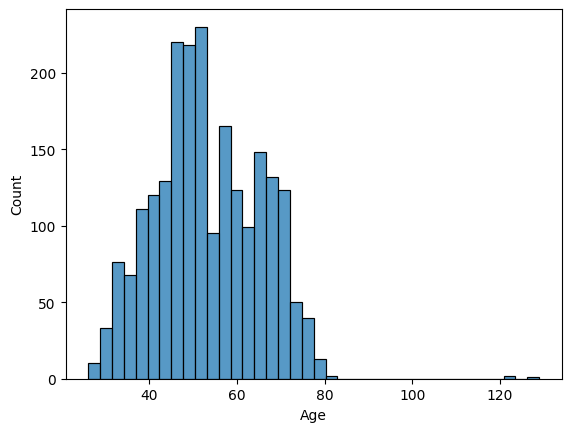

In [ ]:
df['Age'] = 2022 - df['Year_Birth']
sns.histplot(df.Age)

#### Creating Total number of campaigns accepted

In [ ]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


#### Creating Average spend per purchase:


In [ ]:
df['Average_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases']


#### Creating Spent

In [ ]:
df['Spent'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] +df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']


#### Creating  "Is_Parent" to indicate parenthood status:

In [ ]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0)


#### Creating total spending in the last 2 years || average monthly visits to the company's website ||  ratio of online purchases to total purchases

In [ ]:
# create new feature for total spending in the last 2 years
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# create new feature for average monthly visits to the company's website
df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12

# create new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])


#### Dropping non relevant Columns/Features

In [ ]:
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis=1)

In [ ]:
df.dtypes

,0
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64


# Exploratory data analysis

### Distribution of Income


<Axes: xlabel='Income', ylabel='Count'>

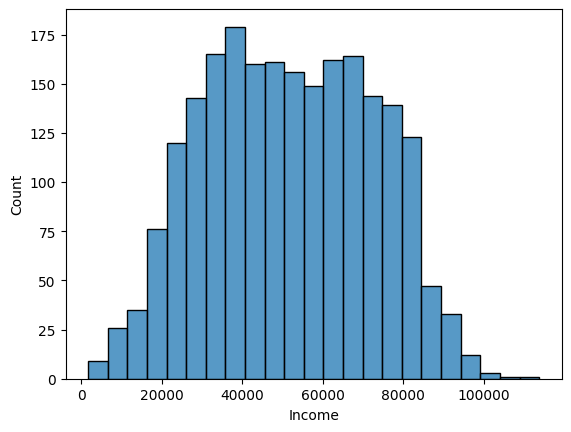

In [ ]:
sns.histplot(df.Income)

### Distribution of Age

### Marital Status Distribution

<Axes: xlabel='Marital_Status', ylabel='Count'>

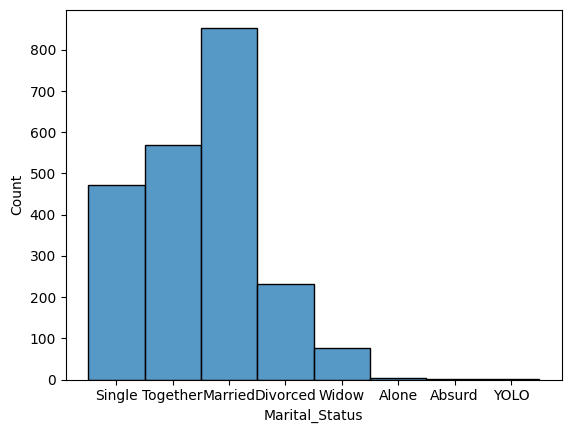

In [ ]:
sns.histplot(df.Marital_Status)

<Axes: xlabel='Living_Status', ylabel='Count'>

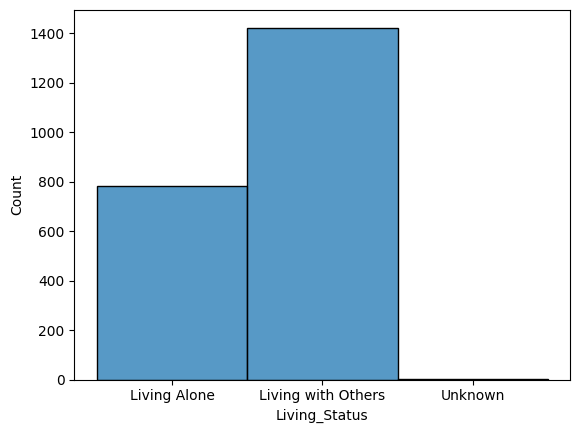

In [ ]:
sns.histplot(df.Living_Status)

### Education Level Distribution

<Axes: xlabel='Education_Level', ylabel='Count'>

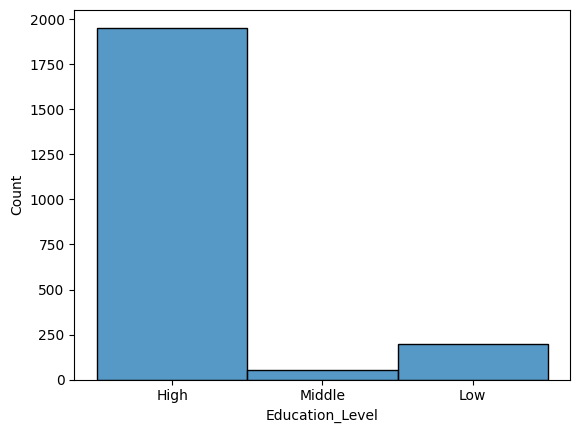

In [ ]:
sns.histplot(df.Education_Level)

### Average Spend by Marital Status

<ipython-input-40-c9d4e0683704>:1: FutureWarning: The provided callable <function mean at 0x78340bbb53a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_plot = df.groupby(['Living_Status']).agg({'Average_Spend': np.mean}).reset_index()


<Axes: xlabel='Living_Status', ylabel='Average_Spend'>

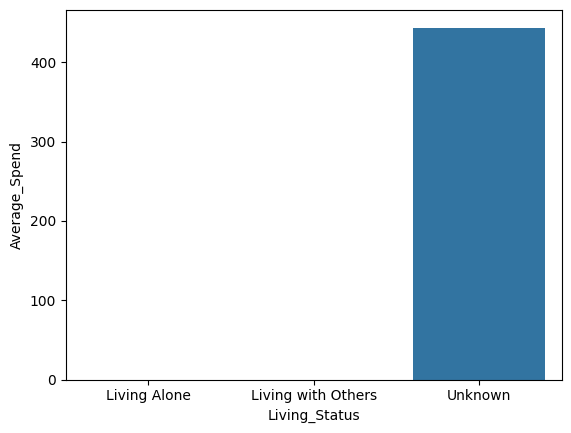

In [ ]:
df_plot = df.groupby(['Living_Status']).agg({'Average_Spend': np.mean}).reset_index()
sns.barplot(df_plot, x='Living_Status', y='Average_Spend')

In [ ]:
df_plot

,Living_Status,Average_Spend
0,Living Alone,inf
1,Living with Others,inf
2,Unknown,443.816667


In [ ]:
df[df.Average_Spend == np.inf]['NumDealsPurchases'][:3]

,NumDealsPurchases
77,0
116,0
124,0


In [ ]:
df['NumDealsPurchases_m'] = df['NumDealsPurchases'].map(lambda x: max(1, x))

In [ ]:
df['Average_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases_m']

<ipython-input-45-c9d4e0683704>:1: FutureWarning: The provided callable <function mean at 0x78340bbb53a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_plot = df.groupby(['Living_Status']).agg({'Average_Spend': np.mean}).reset_index()


<Axes: xlabel='Living_Status', ylabel='Average_Spend'>

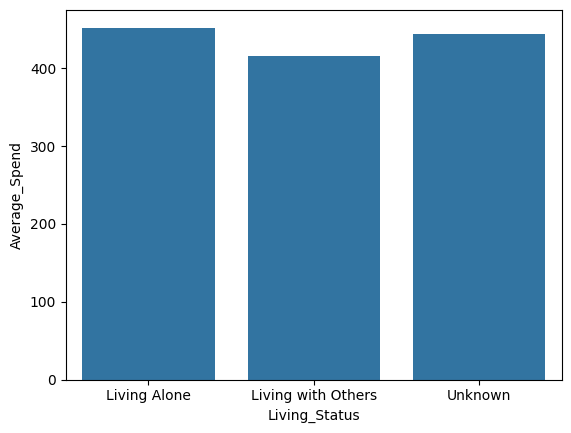

In [ ]:
df_plot = df.groupby(['Living_Status']).agg({'Average_Spend': np.mean}).reset_index()
sns.barplot(df_plot, x='Living_Status', y='Average_Spend')

### Average Spend by Education Leve

<ipython-input-46-e59dba3fc955>:1: FutureWarning: The provided callable <function mean at 0x78340bbb53a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_plot = df.groupby(['Education_Level']).agg({'Average_Spend': np.mean}).reset_index()


<Axes: xlabel='Education_Level', ylabel='Average_Spend'>

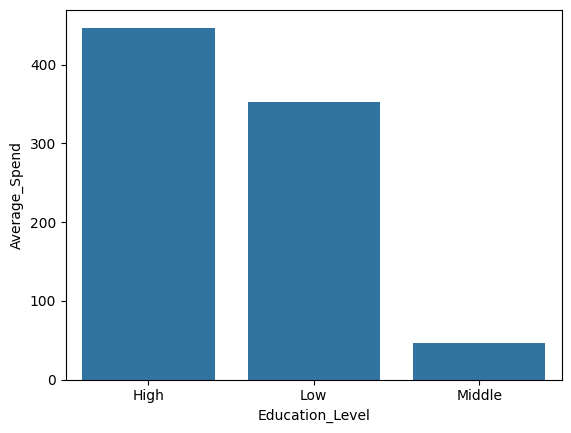

In [ ]:
df_plot = df.groupby(['Education_Level']).agg({'Average_Spend': np.mean}).reset_index()
sns.barplot(df_plot, x='Education_Level', y='Average_Spend')


### the distribution of number of children in household

<Axes: xlabel='Kidhome', ylabel='Count'>

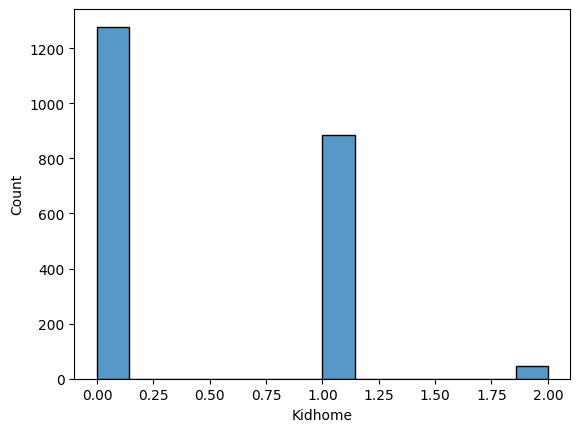

In [ ]:
sns.histplot(df.Kidhome)

### the distribution of number of teenagers in household

<Axes: xlabel='Teenhome', ylabel='Count'>

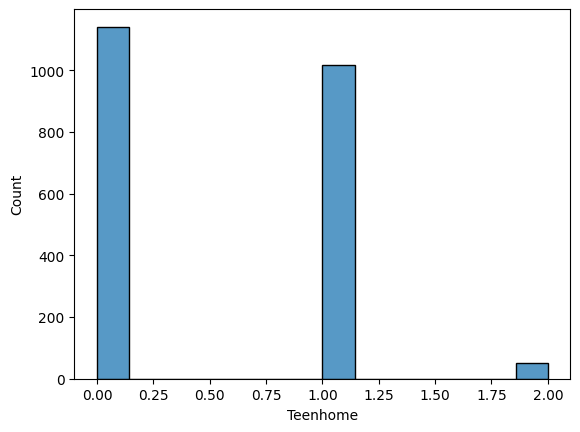

In [ ]:
sns.histplot(df.Teenhome)

### "Total Campaigns Accepted Distribution"

"Total Campaigns Accepted Distribution", we are plotting a histogram of the Total_Campaigns_Accepted column. This plot will show us the distribution of the number of campaigns accepted by each customer.

Text(0.5, 1.0, 'Total Campaigns Accepted Distribution')

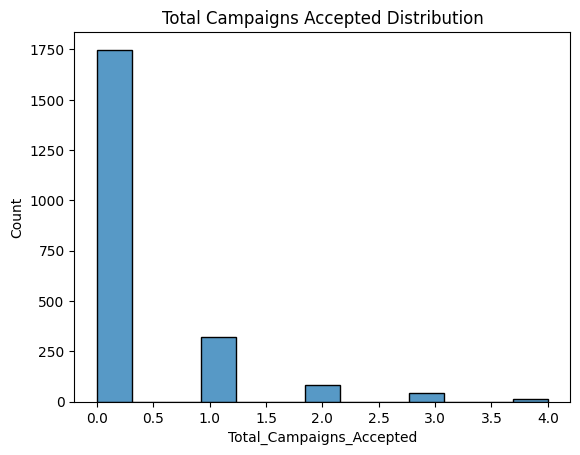

In [ ]:
sns.histplot(df.Total_Campaigns_Accepted).set_title("Total Campaigns Accepted Distribution")

 ### "Average Spend per Purchase Distribution"

 "Average Spend per Purchase Distribution", we are plotting a histogram of the Average_Spend column. This plot will show us the distribution of the average spend per purchase made by each customer.

Text(0.5, 1.0, 'Total Campaigns Accepted Distribution')

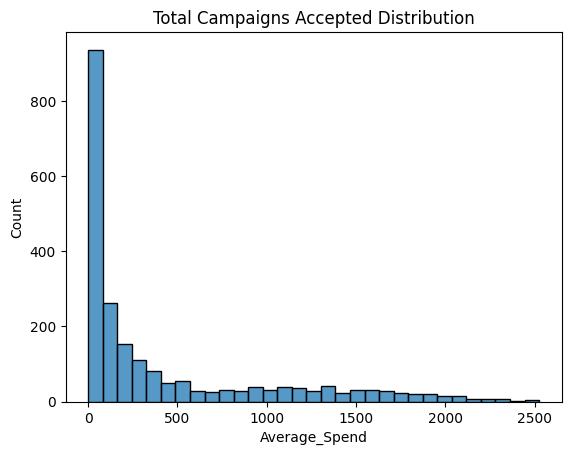

In [ ]:
sns.histplot(df.Average_Spend).set_title("Total Campaigns Accepted Distribution")

### Spending Distribution by Marital Status
### Spending Distribution by Education Level
### Spending Distribution by Is_Parent

Text(0.5, 1.0, 'Marital_Status Distribution')

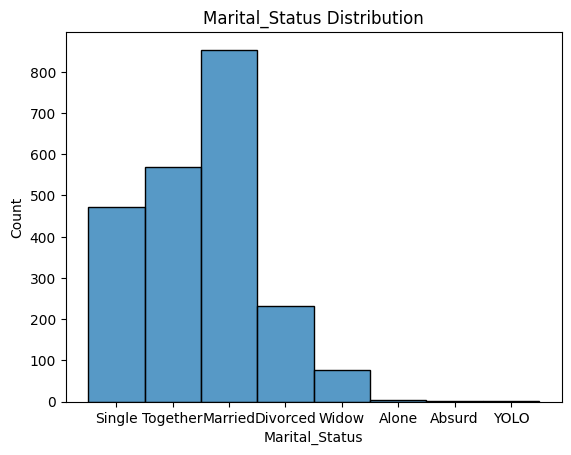

In [ ]:
sns.histplot(df.Marital_Status).set_title("Marital_Status Distribution")

Text(0.5, 1.0, 'Education_Level Distribution')

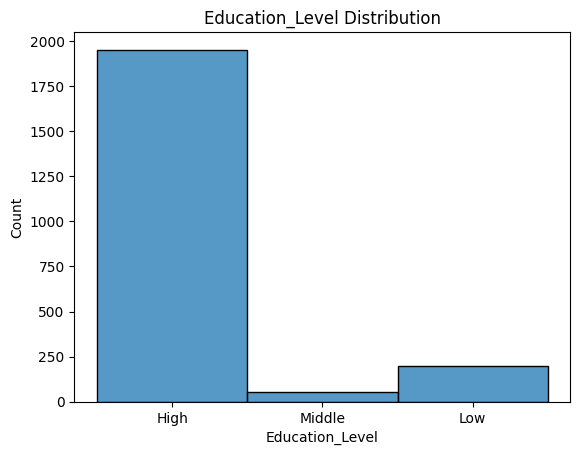

In [ ]:
sns.histplot(df.Education_Level).set_title("Education_Level Distribution")

Text(0.5, 1.0, 'Is_Parent Distribution')

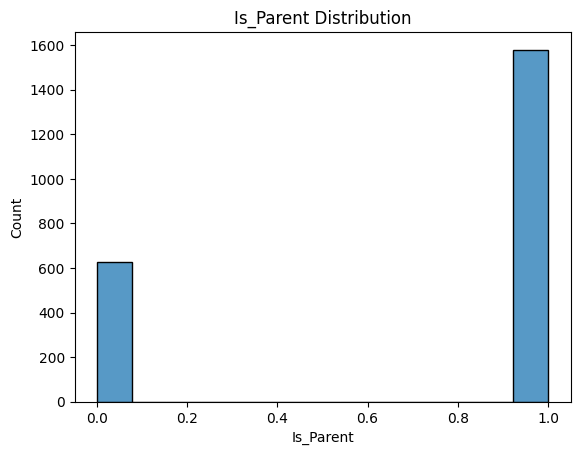

In [ ]:
sns.histplot(df.Is_Parent).set_title("Is_Parent Distribution")

### the Distribution of Online Purchase Ratio

Text(0.5, 1.0, 'online_purchase_ratio Distribution')

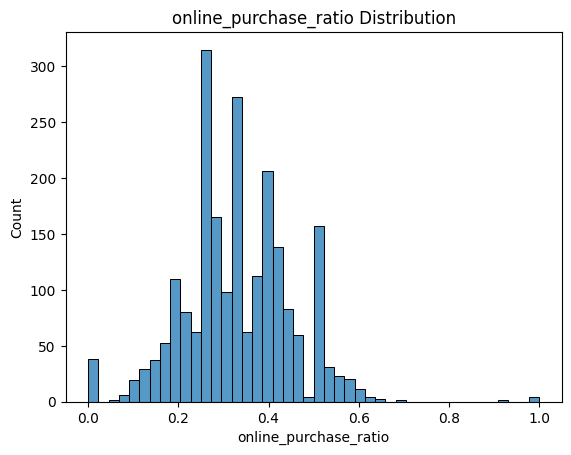

In [ ]:
sns.histplot(df.online_purchase_ratio).set_title("online_purchase_ratio Distribution")

Text(0.5, 1.0, 'NumWebVisitsMonth Distribution')

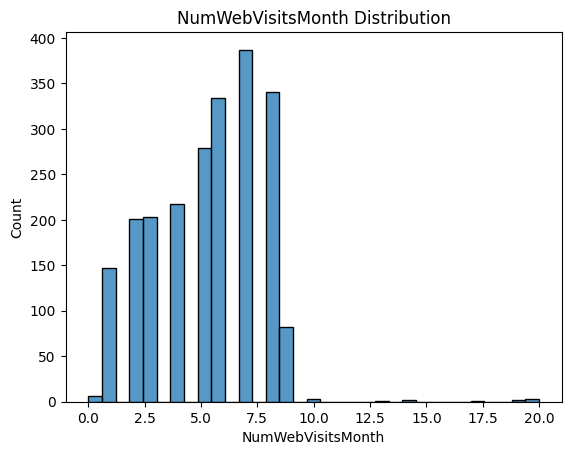

In [ ]:
sns.histplot(df.NumWebVisitsMonth).set_title("NumWebVisitsMonth Distribution")

### the Distribution of Number of Web Purchases

Text(0.5, 1.0, 'NumWebPurchases Distribution')

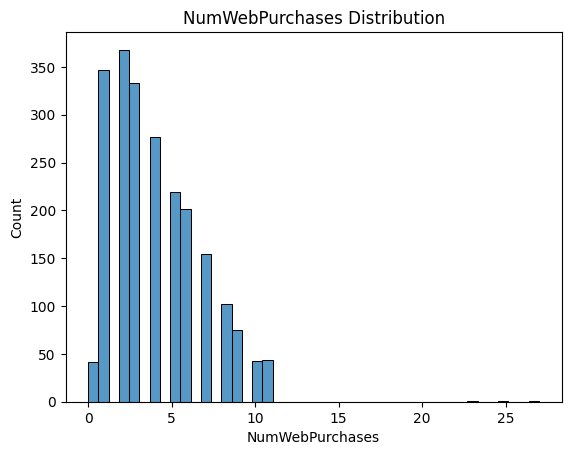

In [ ]:
sns.histplot(df.NumWebPurchases).set_title("NumWebPurchases Distribution")

### Distribution of Number of Catalog Purchases

Text(0.5, 1.0, 'NumCatalogPurchases Distribution')

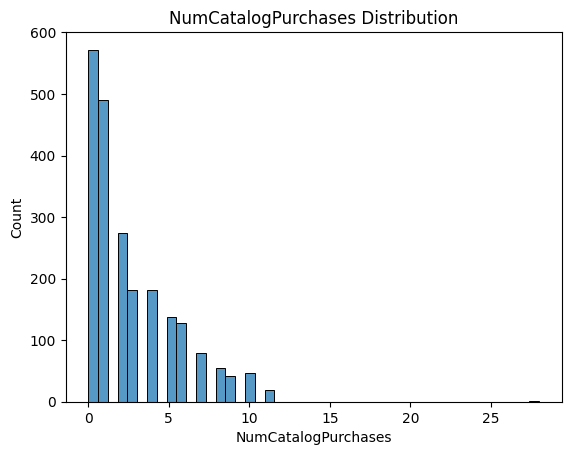

In [ ]:
sns.histplot(df.NumCatalogPurchases).set_title("NumCatalogPurchases Distribution")

### Distribution of Number of Store Purchases

Text(0.5, 1.0, 'NumStorePurchases Distribution')

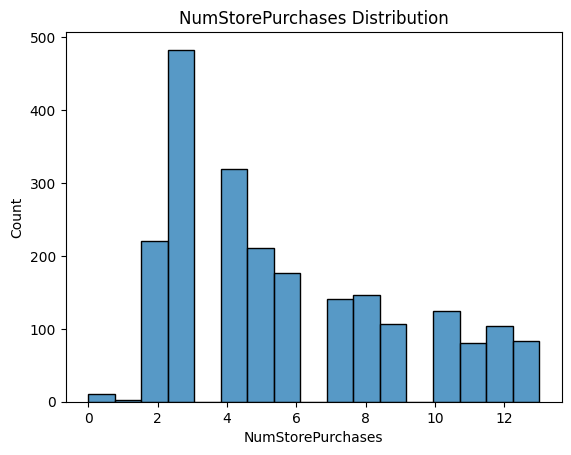

In [ ]:
sns.histplot(df.NumStorePurchases).set_title("NumStorePurchases Distribution")

### "NumWebPurchases" vs "NumStorePurchases"

<Axes: xlabel='NumWebPurchases', ylabel='NumStorePurchases'>

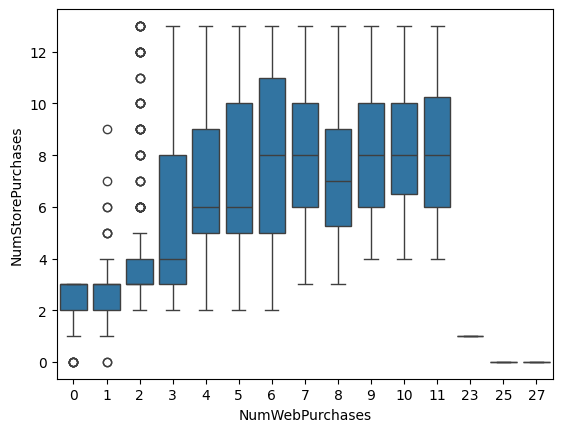

In [ ]:
sns.boxplot(df, x="NumWebPurchases", y="NumStorePurchases")

###  scatter plot of "NumWebPurchases" vs "NumWebVisitsMonth"

<Axes: xlabel='NumWebPurchases', ylabel='NumWebVisitsMonth'>

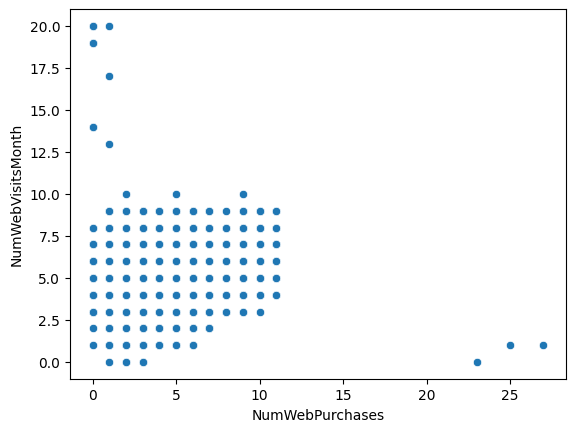

In [ ]:
sns.scatterplot(data=df, x='NumWebPurchases', y='NumWebVisitsMonth')

###  Scatter plot of "MntFruits" vs "MntMeatProducts"

<Axes: xlabel='MntFruits', ylabel='MntMeatProducts'>

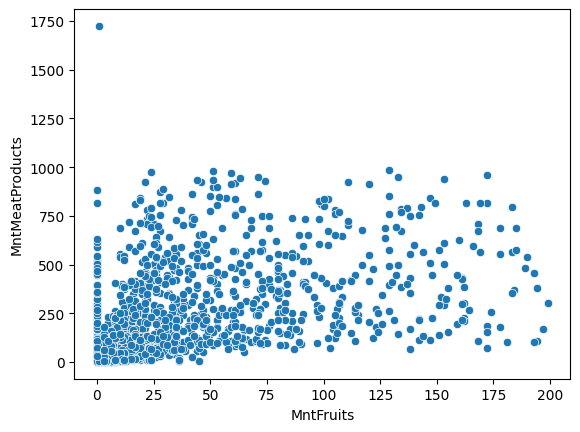

In [ ]:
sns.scatterplot(data=df, x='MntFruits', y='MntMeatProducts')

###  Scatter plot of "MntWines" vs "MntSweetProducts"

<Axes: xlabel='MntWines', ylabel='MntMeatProducts'>

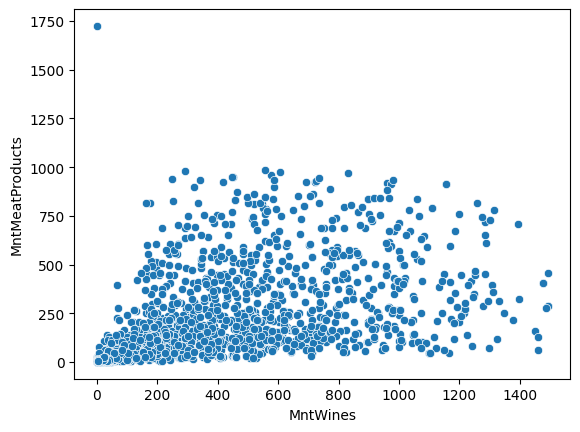

In [ ]:
sns.scatterplot(data=df, x='MntWines', y='MntMeatProducts')

### Scatter plot of "MntWines" vs "MntSweetProducts" with a "Income"

<Axes: xlabel='MntWines', ylabel='MntSweetProducts'>

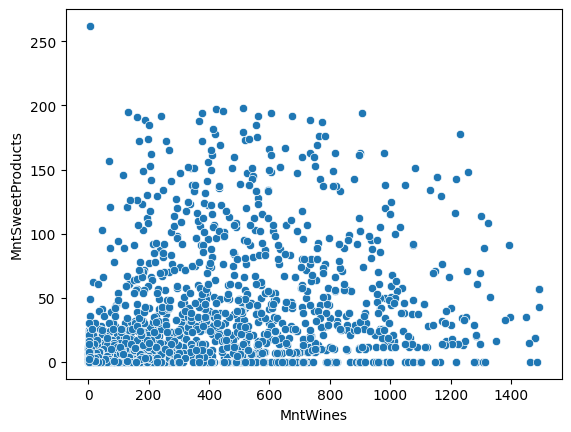

In [ ]:
sns.scatterplot(data=df, x='MntWines', y='MntSweetProducts')

###  Violin plot of "AcceptedCmp1" vs "AcceptedCmp2"
###  Violin plot of "AcceptedCmp3" vs "AcceptedCmp4"


A violin plot is a type of box plot that shows the probability density of the data at different values. The violin plot shows the distribution of the data, including the median, quartiles, and the distribution of the data. In this case, we are using the violin plot to see if there is a relationship between the two campaigns (AcceptedCmp1 vs AcceptedCmp2 and AcceptedCmp3 vs AcceptedCmp4). If there is a relationship between the two campaigns, then the violin plots will show similar shapes and distributions, indicating that the customers who accepted one campaign are likely to accept the other campaign as well.

<Axes: xlabel='AcceptedCmp1', ylabel='AcceptedCmp2'>

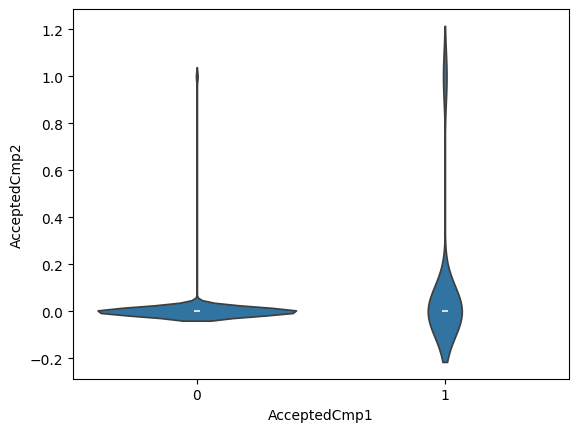

In [ ]:
sns.violinplot(df, x="AcceptedCmp1", y="AcceptedCmp2", )


<Axes: xlabel='AcceptedCmp3', ylabel='AcceptedCmp4'>

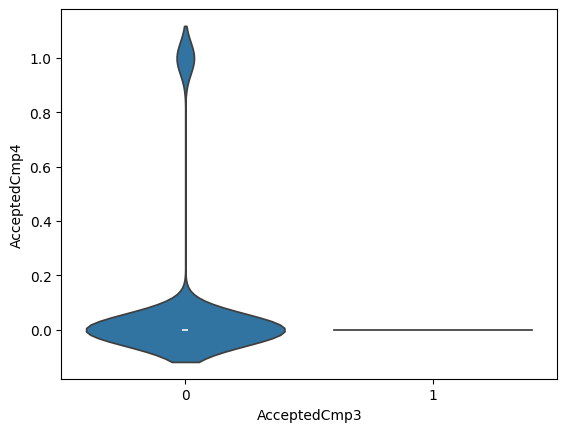

In [ ]:
sns.violinplot(df, x="AcceptedCmp3", y="AcceptedCmp4")

###  Scatter plot of "NumDealsPurchases" vs "NumCatalogPurchases"

<Axes: xlabel='NumDealsPurchases', ylabel='NumCatalogPurchases'>

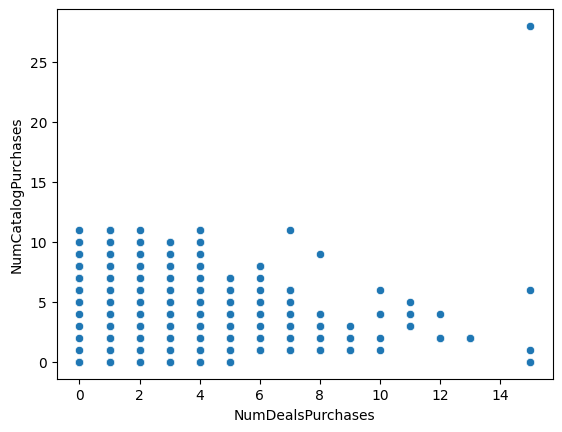

In [ ]:
sns.scatterplot(data=df, x='NumDealsPurchases', y='NumCatalogPurchases')

###  Pairplot of "Income", "NumWebPurchases", and "NumStorePurchases"

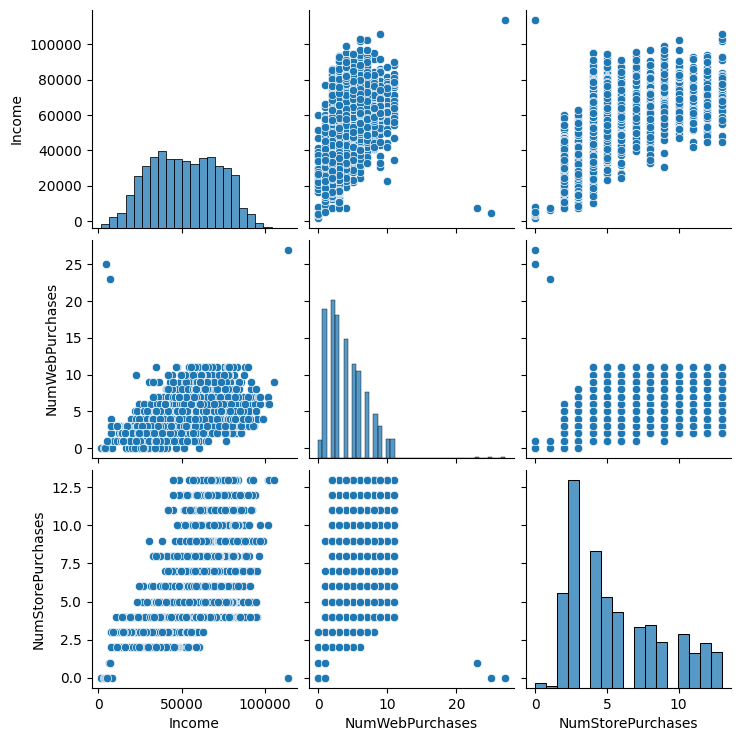

In [ ]:
sns.pairplot(df.loc[:, ["Income", "NumWebPurchases", "NumStorePurchases"]])

In [ ]:
df.dtypes

,0
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64


# Clustering

## One-hot encoding

In [ ]:
# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=["Marital_Status", "Education","Education_Level","Living_Status"])

## Data Scaling StandardScaler

In [ ]:
# Select the numerical columns to scale
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
            'total_spending', 'avg_web_visits', 'online_purchase_ratio', 'Age',
            'Total_Campaigns_Accepted', 'Is_Parent']

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Income                            2208 non-null   float64
 1   Kidhome                           2208 non-null   float64
 2   Teenhome                          2208 non-null   float64
 3   Recency                           2208 non-null   float64
 4   MntWines                          2208 non-null   float64
 5   MntFruits                         2208 non-null   float64
 6   MntMeatProducts                   2208 non-null   float64
 7   MntFishProducts                   2208 non-null   float64
 8   MntSweetProducts                  2208 non-null   float64
 9   MntGoldProds                      2208 non-null   float64
 10  NumDealsPurchases                 2208 non-null   float64
 11  NumWebPurchases                   2208 non-null   float64
 12  NumCatalogP

In [ ]:
df.online_purchase_ratio.fillna(df.online_purchase_ratio.mean(), inplace=True)

<ipython-input-72-8726b81a1603>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.online_purchase_ratio.fillna(df.online_purchase_ratio.mean(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Income                            2208 non-null   float64
 1   Kidhome                           2208 non-null   float64
 2   Teenhome                          2208 non-null   float64
 3   Recency                           2208 non-null   float64
 4   MntWines                          2208 non-null   float64
 5   MntFruits                         2208 non-null   float64
 6   MntMeatProducts                   2208 non-null   float64
 7   MntFishProducts                   2208 non-null   float64
 8   MntSweetProducts                  2208 non-null   float64
 9   MntGoldProds                      2208 non-null   float64
 10  NumDealsPurchases                 2208 non-null   float64
 11  NumWebPurchases                   2208 non-null   float64
 12  NumCatalogP

# PCA

In [ ]:
# Initialize the PCA model
pca = PCA(n_components=10)

# Fit and transform the data
df_pca = pca.fit_transform(df)


In [ ]:
df_pca

array([[ 1.21189062e+03, -5.80088042e+02, -9.21523750e-01, ...,
        -7.53818956e-02, -5.55176894e-01,  7.28339125e-01],
       [-9.64882682e+02,  8.29641769e+01, -6.20990451e-01, ...,
        -1.08155442e+00,  2.62913761e-01, -2.42255889e-01],
       [ 4.24810660e+02,  1.54196682e+02, -5.55132351e-01, ...,
         2.41863362e-01, -1.19916949e+00,  5.05321385e-01],
       ...,
       [ 1.47705843e+03,  7.80065588e+01, -1.22785699e+00, ...,
         1.21489365e+00, -3.01812113e-01,  2.72689340e-01],
       [ 3.05569239e+02, -1.86706882e+02, -1.64785405e+00, ...,
        -1.09024706e+00, -6.95848393e-01,  7.88291287e-02],
       [-7.54538533e+02,  1.08377202e+01,  1.00009240e+00, ...,
        -1.62957615e+00, -1.38042164e-01, -7.92728493e-02]])

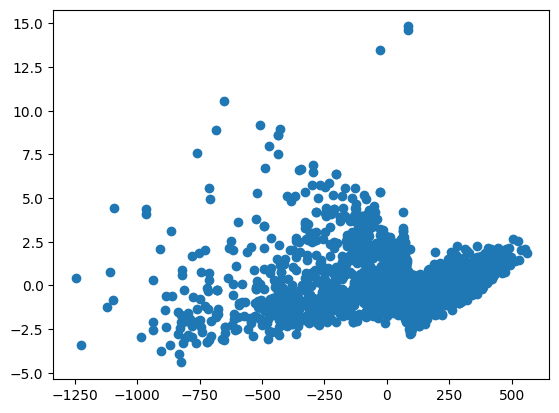

In [ ]:
plt.scatter(df_pca[:,1],df_pca[:,2])
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([9.39651526e-01, 6.03291117e-02, 2.54743627e-06, 2.30095635e-06,
       1.45110489e-06, 1.23017262e-06, 1.14845350e-06, 9.30614885e-07,
       8.88853001e-07, 8.45608296e-07])

In [ ]:
pd.DataFrame(pca.explained_variance_)

,0
0,1.104029e+06
1,7.088277e+04
2,2.993072e+00
3,2.703474e+00
4,1.704954e+00
5,1.445373e+00
6,1.349358e+00
7,1.093412e+00
8,1.044344e+00
9,9.935346e-01


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

# Determining the optimal number of clusters using Silhouette Score

In [ ]:
list_k = list(range(2, 10))
silhouette_scores = []
for k in list_k:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, preds))

best_k = list_k[np.argmax(silhouette_scores)]


In [ ]:
best_k

2

In [ ]:
silhouette_scores

[np.float64(0.654061510982259),
 np.float64(0.6210249298179131),
 np.float64(0.5711206126831022),
 np.float64(0.5955634086101955),
 np.float64(0.5748435401414039),
 np.float64(0.596261878069755),
 np.float64(0.5790256364116214),
 np.float64(0.5722374596315186)]

## Algorithms

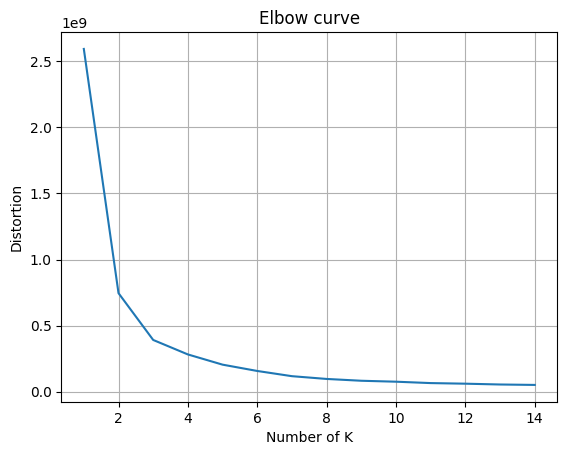

In [ ]:
distorsions = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distorsions.append(kmeans.inertia_)

plt.plot(range(1, 15), distorsions)
plt.title('Elbow curve')
plt.xlabel('Number of K')
plt.ylabel('Distortion')
plt.grid()

In [ ]:
d1_kmeans = KMeans(n_clusters=3).fit(df)
print(silhouette_score(df, d1_kmeans.labels_ ))

0.620535840035324


In [ ]:
d1_kmeans.labels_

array([2, 0, 2, ..., 1, 2, 0], dtype=int32)

In [ ]:
d1_hier = AgglomerativeClustering(n_clusters = 3,  linkage= 'average').fit(df)
print(silhouette_score(df, d1_hier.labels_))

0.614868899165304


In [ ]:
d1_dbscan = DBSCAN(eps=100, min_samples=7, metric='euclidean').fit(df)
print(silhouette_score(df, d1_dbscan.labels_))

0.25148183971688964


<Axes: ylabel='Count'>

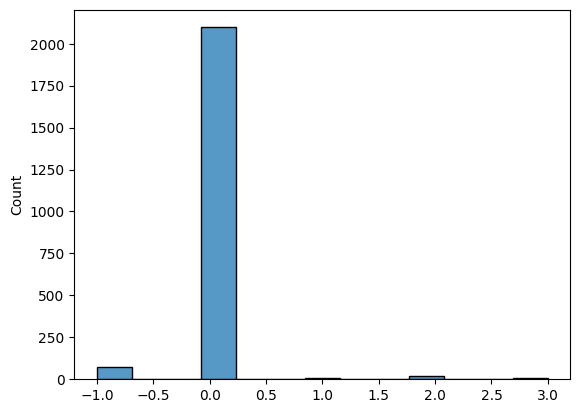

In [ ]:
sns.histplot(d1_dbscan.labels_)

In [ ]:
df.iloc[d1_dbscan.labels_ == -1]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Education_Level_High,Education_Level_Low,Education_Level_Middle,Living_Status_Living Alone,Living_Status_Living with Others,Living_Status_Unknown
0,0.314089,-0.823235,-0.930428,0.310588,0.974689,1.545554,1.747688,2.449620,1.480933,0.846621,...,False,True,False,False,True,False,False,True,False,False
18,1.224673,-0.823235,0.907126,1.451190,2.091926,1.344718,1.527305,-0.689014,-0.270565,2.544142,...,False,False,True,False,True,False,False,False,True,False
49,1.010028,1.039166,0.907126,-0.346122,1.540716,0.591582,0.696280,0.223379,0.264615,-0.117881,...,False,False,False,True,True,False,False,False,True,False
77,1.168175,-0.823235,-0.930428,-0.311559,2.151195,1.972331,2.817460,1.810944,1.894481,0.132890,...,False,True,False,False,True,False,False,True,False,False
161,0.904083,-0.823235,-0.930428,-1.002833,3.090622,-0.261972,0.384072,0.095644,-0.270565,-0.214331,...,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,1.254370,-0.823235,0.907126,0.725353,2.782419,0.164805,0.765150,-0.305809,0.142983,-0.542261,...,False,False,False,True,True,False,False,False,True,False
2098,1.462930,1.039166,-0.930428,0.379715,3.496620,0.717105,0.517220,0.205132,-0.659786,2.717753,...,False,False,True,False,True,False,False,False,True,False
2099,1.179909,-0.823235,0.907126,0.621661,2.397165,-0.362390,-0.171475,-0.086834,-0.367870,0.615140,...,False,True,False,False,True,False,False,False,True,False
2151,0.848695,-0.823235,-0.930428,-1.555852,0.562764,0.139701,3.138851,3.489749,0.507879,1.618221,...,False,True,False,False,True,False,False,False,True,False


In [ ]:
d1_gm = GaussianMixture(n_components=2, random_state=0).fit(df)
print(silhouette_score(df, d1_gm.predict(df)))

0.5578557178632324


In [ ]:
print("K-means: ",silhouette_score(df, d1_kmeans.labels_ ))
print("Hierarchical: ",silhouette_score(df, d1_hier.labels_))
print("DBSCAN: ",silhouette_score(df, d1_dbscan.labels_))
print("GM: ",silhouette_score(df, d1_gm.predict(df)))

K-means:  0.620535840035324
Hierarchical:  0.614868899165304
DBSCAN:  0.25148183971688964
GM:  0.5578557178632324


In [ ]:
silhouette_kmean = []
silhouette_hier = []
silhouette_db = []
silhouette_gm = []
for i in range(2,39):
    df_PCA = PCA(n_components = i, copy = False).fit_transform(df)

    d_kmeans = KMeans(n_clusters=4).fit(df_PCA)
    silhouette_kmean.append(round(silhouette_score(df_PCA, d_kmeans.labels_ ),4))

    d_hier = AgglomerativeClustering(n_clusters = 3, linkage= 'average').fit(df_PCA)
    silhouette_hier.append(round(silhouette_score(df_PCA, d_hier.labels_),4))

    d_dbscan = DBSCAN(eps=0.5, min_samples=2).fit(df_PCA)
    silhouette_db.append(round(silhouette_score(df_PCA, d_dbscan.labels_),48))

    d_gm = GaussianMixture(n_components=2, random_state=0).fit(df_PCA)
    silhouette_gm.append(round(silhouette_score(df_PCA, d_gm.predict(df_PCA)),4))

In [ ]:
print("Kmean")
print(silhouette_kmean)
print()
print("Hierarchical")
print(silhouette_hier)
print()
print("DBSCAN")
print(silhouette_db)
print()
print("GM")
print(silhouette_gm)

Kmean
[np.float64(0.5712), np.float64(0.5768), np.float64(0.5756), np.float64(0.5712), np.float64(0.5712), np.float64(0.5755), np.float64(0.5755), np.float64(0.5755), np.float64(0.574), np.float64(0.5754), np.float64(0.5735), np.float64(0.5754), np.float64(0.5756), np.float64(0.5711), np.float64(0.5754), np.float64(0.5711), np.float64(0.5754), np.float64(0.5711), np.float64(0.5754), np.float64(0.574), np.float64(0.5735), np.float64(0.5755), np.float64(0.5711), np.float64(0.5754), np.float64(0.5754), np.float64(0.5735), np.float64(0.5754), np.float64(0.5747), np.float64(0.5755), np.float64(0.5754), np.float64(0.5754), np.float64(0.5735), np.float64(0.5711), np.float64(0.5754), np.float64(0.5754), np.float64(0.5711), np.float64(0.5742)]

Hierarchical
[np.float64(0.615), np.float64(0.6065), np.float64(0.6149), np.float64(0.6149), np.float64(0.6149), np.float64(0.6149), np.float64(0.6149), np.float64(0.6149), np.float64(0.6149), np.float64(0.6149), np.float64(0.6149), np.float64(0.6149), n

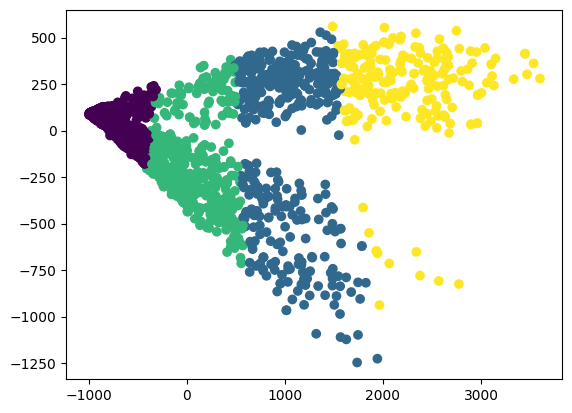

In [ ]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(df))

d_kmeans = KMeans(n_clusters=4).fit(df_PCA)
df_PCA['Cluster'] = d_kmeans.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

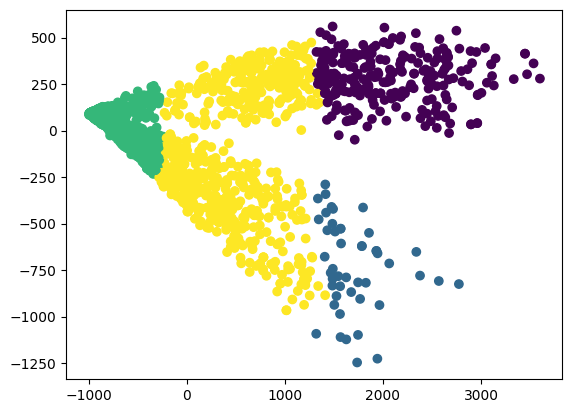

In [ ]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(df))

d_hier = AgglomerativeClustering(n_clusters = 4, linkage= 'average').fit(df_PCA)
df_PCA['Cluster'] = d_hier.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

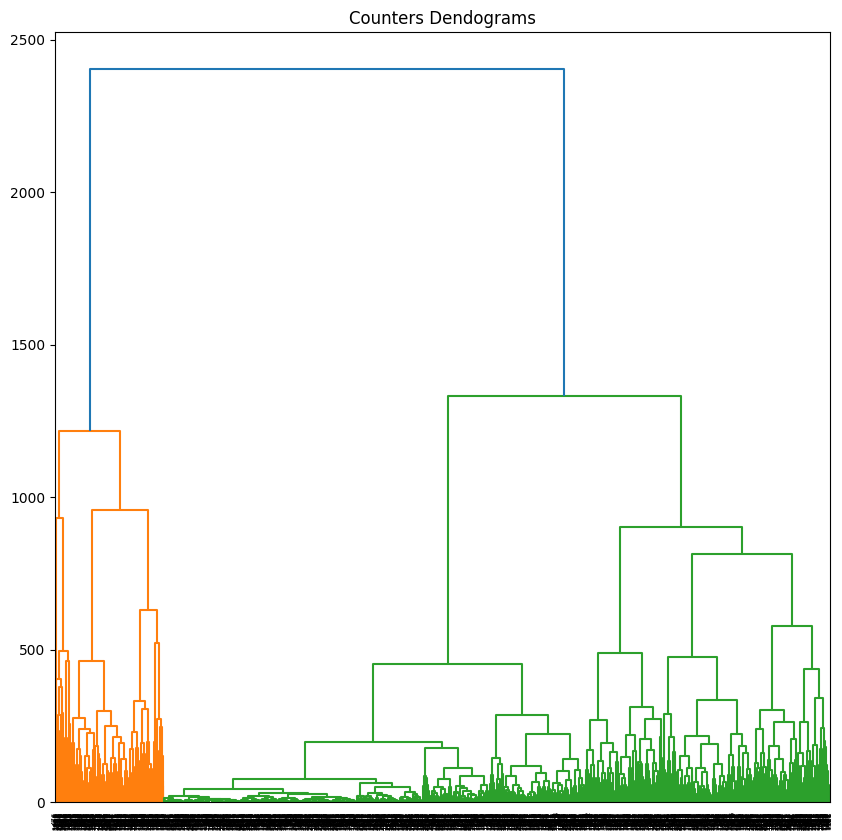

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Counters Dendograms")
dend_avg = shc.dendrogram(shc.linkage(y=df_PCA , method='average',metric='euclidean')
                          ,orientation='top')

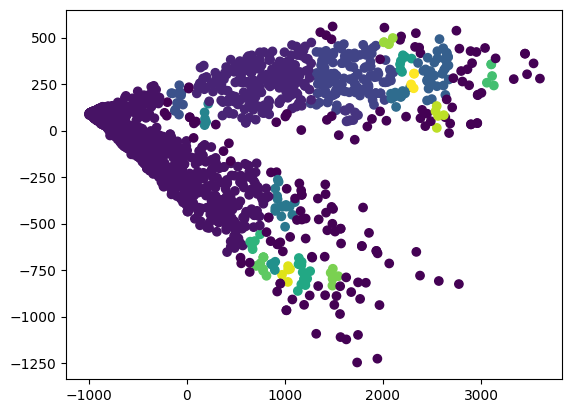

In [ ]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(df))

d_dbscan = DBSCAN(eps=70, min_samples=5).fit(df_PCA)
df_PCA['Cluster'] = d_dbscan.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

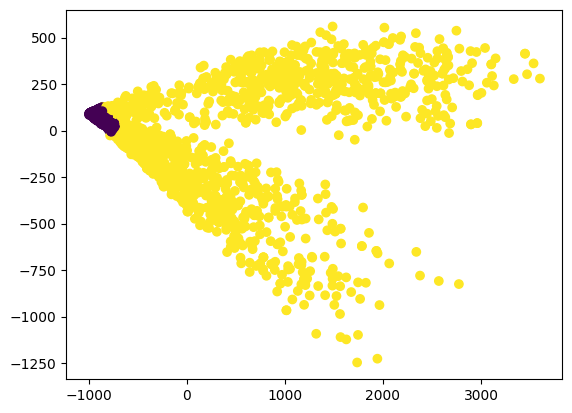

In [ ]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(df))

d_gm = GaussianMixture(n_components=2, random_state=0).fit(df_PCA)
df_PCA['Cluster'] = d_gm.predict(df_PCA)

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

In [ ]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Education_Level_High,Education_Level_Low,Education_Level_Middle,Living_Status_Living Alone,Living_Status_Living with Others,Living_Status_Unknown
0,0.314089,-0.823235,-0.930428,0.310588,0.974689,1.545554,1.747688,2.449620,1.480933,0.846621,...,False,True,False,False,True,False,False,True,False,False
1,-0.255431,1.039166,0.907126,-0.380686,-0.874529,-0.638540,-0.731613,-0.652518,-0.635460,-0.735161,...,False,True,False,False,True,False,False,True,False,False
2,0.964782,-0.823235,-0.930428,-0.795450,0.355320,0.566478,-0.176066,1.336500,-0.148933,-0.040720,...,False,True,False,False,True,False,False,False,True,False
3,-1.206626,1.039166,-0.930428,-0.795450,-0.874529,-0.563226,-0.667335,-0.506535,-0.586807,-0.754451,...,False,True,False,False,True,False,False,False,True,False
4,0.321573,1.039166,-0.930428,1.554881,-0.394444,0.415851,-0.217388,0.150388,-0.002975,-0.561551,...,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.463060,-0.823235,0.907126,-0.104176,1.193988,0.415851,0.076455,0.077396,2.210723,3.913734,...,False,True,False,False,True,False,False,False,True,False
2236,0.597834,2.901566,0.907126,0.241461,0.296050,-0.663644,-0.621422,-0.689014,-0.659786,-0.696581,...,False,False,False,True,True,False,False,False,True,False
2237,0.258218,-0.823235,-0.930428,1.451190,1.783722,0.541373,0.237151,-0.105082,-0.367870,-0.387941,...,False,True,False,False,True,False,False,True,False,False
2238,0.850434,-0.823235,0.907126,-1.417597,0.361247,0.089492,0.223377,0.770816,0.070004,0.325790,...,False,False,True,False,True,False,False,False,True,False


In [ ]:
df.iloc[125:126]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Education_Level_High,Education_Level_Low,Education_Level_Middle,Living_Status_Living Alone,Living_Status_Living with Others,Living_Status_Unknown
136,-2.03227,1.039166,-0.930428,-0.622632,-0.907128,-0.63854,-0.745387,-0.506535,-0.513828,-0.677291,...,True,False,False,False,False,False,True,True,False,False


In [ ]:
d1_kmeans.labels_[125]

np.int32(0)

In [ ]:
df_PCA = pd.DataFrame(PCA(n_components = 4, copy = False).fit_transform(df))
df_PCA

,0,1,2,3
0,1211.890615,-580.088042,-0.921524,-0.738870
1,-964.882682,82.964177,-0.620990,-0.330504
2,424.810660,154.196682,-0.555132,-1.224104
3,-935.876184,81.076099,-0.168599,0.413021
4,-448.172375,-136.795536,1.958768,-1.046292
...,...,...,...,...
2203,1103.800703,-364.659692,-0.898816,-1.024465
2204,-238.572203,-283.551211,4.220075,1.366998
2205,1477.058434,78.006559,-1.227857,1.428585
2206,305.569239,-186.706882,-1.647854,-1.904080


In [ ]:
pc_val = pd.DataFrame({'pcX': pca.explained_variance_ratio_})
pc_val.sort_values('pcX', ascending=False)

,pcX
0,9.396515e-01
1,6.032911e-02
2,2.547436e-06
3,2.300956e-06
4,1.451105e-06
5,1.230173e-06
6,1.148453e-06
7,9.306149e-07
8,8.888530e-07
9,8.456083e-07


# extras

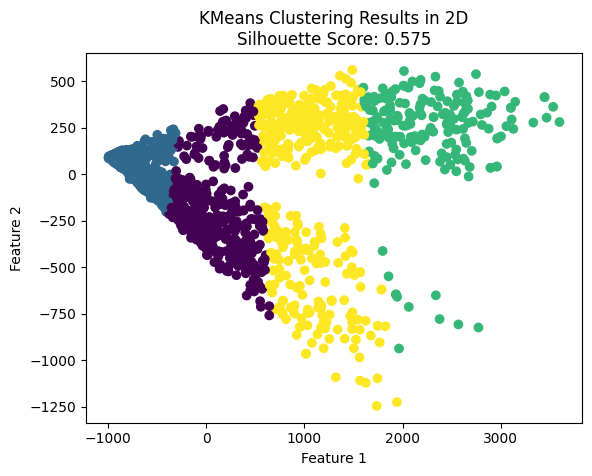

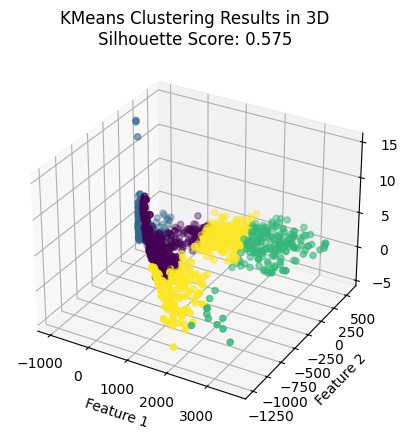

In [ ]:
# Fit the KMeans model with the number of clusters set to 3
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

# Get the predictions
predictions = kmeans.predict(df_pca)

# Calculate the silhouette score
silhouette_score_value = silhouette_score(df_pca, predictions)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(df_pca, predictions)

# Calculate the Davies-Bouldin Index
davies_bouldin_score_value = davies_bouldin_score(df_pca, predictions)

# Visualize the results in 2D
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results in 2D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

# Visualize the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=predictions, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering Results in 3D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

### Agglomerative Clustering

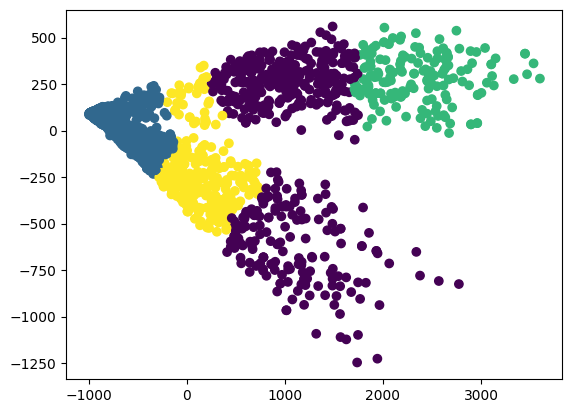

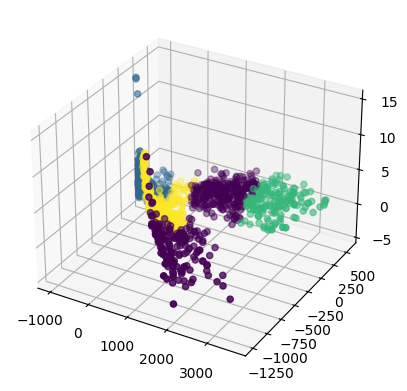

Davies-Bouldin Index: 0.7665955297818856
Silhouette Score: 0.5394597671560154
Calinski-Harabasz Index: 5265.850496072755


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import davies_bouldin_score

# Generate sample data
X = df_pca

# Compute the pairwise distances between samples
dist_matrix = squareform(pdist(X))

# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_cluster.fit(X)

# Plot the data points colored by their cluster labels in 2D
plt.scatter(X[:, 0], X[:, 1], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Plot the data points colored by their cluster labels in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Calculate the Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X, agg_cluster.labels_)
print("Davies-Bouldin Index:", davies_bouldin_index)
# Calculate the silhouette score
silhouette_score_value = silhouette_score(X, agg_cluster.labels_)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(X, agg_cluster.labels_)

print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Index:", calinski_harabasz_score_value)

# waiter

In [ ]:
from time import sleep
while True:
  sleep(60)

KeyboardInterrupt: 